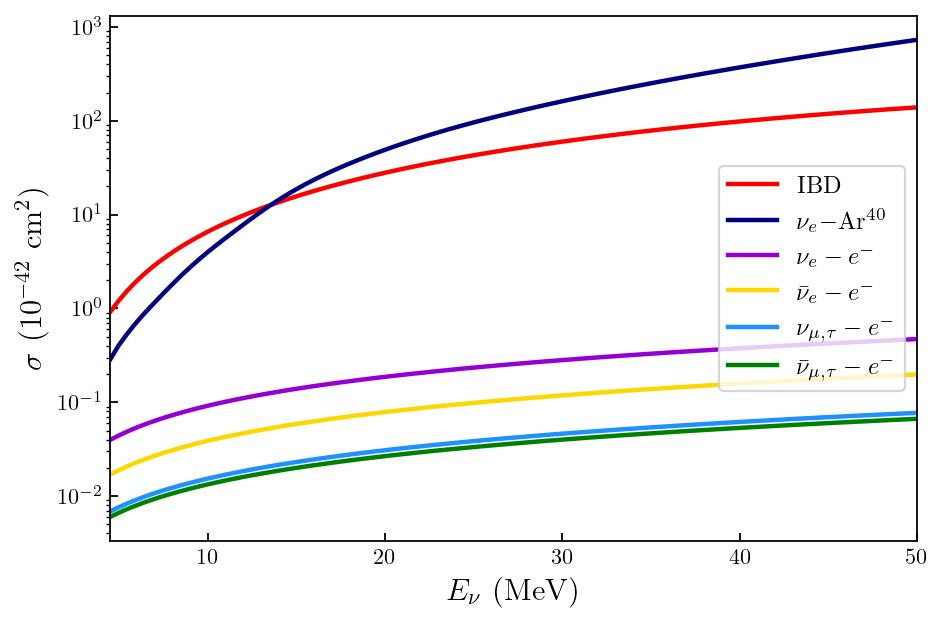

In [ ]:
from interaction import dsigma_dcos_IBD, sigma_nue_Ar, dsigma_dEr_nu_e_ES, cross_ES
from scipy.integrate import simps
import os
import matplotlib.pyplot as plt
import numpy as np
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def cross_sections_plot():
    def elastic_CS():
        Enu = np.linspace(0.1,100,1001)
        Ee = np.linspace(0.1,100,101)
        flavor = 'nue'
        sigma = []
        sigma_th = []
        sigma_th_mu = []
        import matplotlib.pyplot as plt
        from scipy.integrate import simps
        me = 0.51099895000 #MeV  #PDG (2019)

        for Evalue in Enu:
            Eemax = 2*Evalue**2/(me + 2*Evalue)
            Ee = np.linspace(0,Eemax,101)
            Ee_th = np.linspace(4.5,Eemax,101)
            integral = simps(dsigma_dEr_nu_e_ES(Evalue, Ee, flavor), Ee)
            integral_th = simps(dsigma_dEr_nu_e_ES(Evalue, Ee_th, flavor), Ee_th)
            integral_th_mu = simps(dsigma_dEr_nu_e_ES(Evalue, Ee_th, 'numu'), Ee_th)
            sigma.append(integral)
            sigma_th.append(integral_th)
            sigma_th_mu.append(integral_th_mu)

        plt.plot(Enu, cross_ES(Enu),'gray')
        plt.plot(Enu, sigma,'k-',lw=1)
        plt.plot(Enu, sigma_th,'k-',lw=1)
        plt.plot(Enu, sigma_th_mu,'k:',lw=1)
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel(r'$E_\nu$ (MeV)')
        plt.ylabel(r'$\sigma$ ($cm^2$)')
        plt.xlim(0.1,100)
        plt.show()

    fig = plt.figure(figsize=(6,4), dpi=160, facecolor='w', edgecolor='k')
    plt.tick_params(direction='in')
    
    me = 0.51099895000 #MeV  #PDG (2019)
    Emin,Emax = 4.5,50
    E = np.linspace(Emin,Emax,100)
    cos_list = np.linspace(-1,1,201)
    cross_vogel_IBD = []
    dcross_ES_nue = []
    dcross_ES_antinue = []
    dcross_ES_numutau = []
    dcross_ES_antinumutau = []

    for Evalue in E:
        cross_vogel_IBD.append(simps(dsigma_dcos_IBD(Evalue, cos_list), cos_list))
        Eemax = 2*Evalue**2/(me + 2*Evalue)
        Ee_list = np.linspace(0,Eemax,201)        
        integral_nue = simps(dsigma_dEr_nu_e_ES(Evalue, Ee_list, 'nue'), Ee_list)
        integral_antinue = simps(dsigma_dEr_nu_e_ES(Evalue, Ee_list, 'nuebar'), Ee_list)
        integral_numutau = simps(dsigma_dEr_nu_e_ES(Evalue, Ee_list, 'numu'), Ee_list)
        integral_antinumutau = simps(dsigma_dEr_nu_e_ES(Evalue, Ee_list, 'numubar'), Ee_list)
        #integral_nutau = integrate.simps(dsigma_dEr_nu_e_ES(Evalue, Ee_list, 'nutau'), Ee_list)
        #integral_antinutau = integrate.simps(dsigma_dEr_nu_e_ES(Evalue, Ee_list, 'antinutau'), Ee_list)
        dcross_ES_nue.append(integral_nue)
        dcross_ES_antinue.append(integral_antinue)
        dcross_ES_numutau.append(integral_numutau)
        dcross_ES_antinumutau.append(integral_antinumutau)
        #integral_antinue + integral_numu + integral_antinumu + integral_nutau + integral_antinutau
    
    a = 42
    lw_value = 2
    plt.plot(E, 10**a * np.array(cross_vogel_IBD), 'r-', lw=lw_value, label=r'IBD')
    plt.plot(E, 10**a * sigma_nue_Ar(E), '-', c='navy', lw=lw_value, label=r'$\nu_e-$Ar$^{40}$')
    # plt.plot(E, 10**a * cross_ES(E), '--', lw=lw_value, label=r'$\nu-e^-$ (approx.)')
    plt.plot(E, 10**a * np.array(dcross_ES_nue), '-', c='darkviolet', lw=lw_value, label=r'$\nu_e-e^-$')
    plt.plot(E, 10**a * np.array(dcross_ES_antinue), '-', c='gold', lw=lw_value, label=r'$\bar{\nu}_e-e^-$')
    plt.plot(E, 10**a * np.array(dcross_ES_numutau), '-', c='dodgerblue', lw=lw_value, label=r'$\nu_{\mu,\tau}-e^-$')
    plt.plot(E, 10**a * np.array(dcross_ES_antinumutau), 'g-', lw=lw_value, label=r'$\bar{\nu}_{\mu,\tau}-e^-$')
    # plt.plot(E, 10**a * np.array(sigma_nu_C12_NC(E,'nu')), '-', lw=lw_value, label=r'$\nu-C^{12}$')
    # plt.plot(E, 10**a * np.array(sigma_nu_C12_NC(E,'antinu')), '-', lw=lw_value, label=r'$\bar{\nu}-C^{12}$')
    plt.xlim(Emin,Emax)
    plt.xlabel(r'$E_\nu$ (MeV)', fontsize=14)
    plt.ylabel(r'$\sigma$ ($10^{-%i}$ cm$^2$)'%a, fontsize=14)
    plt.yscale('log')
    #plt.ylim(0,300)
    plt.legend(loc='center right', prop={'size': 11})
    plt.tight_layout()
    my_file = 'plots/cross-sections.pdf'
    plt.savefig(my_file, dpi=160, facecolor='w', edgecolor='w')
    plt.show()

cross_sections_plot()

C:\Users\Marcos\AppData\Local\Temp\ipykernel_20780\4230386932.py:74: RuntimeWarning: invalid value encountered in true_divide
  alpha = (2*E - E2)/(E2 - E**2)


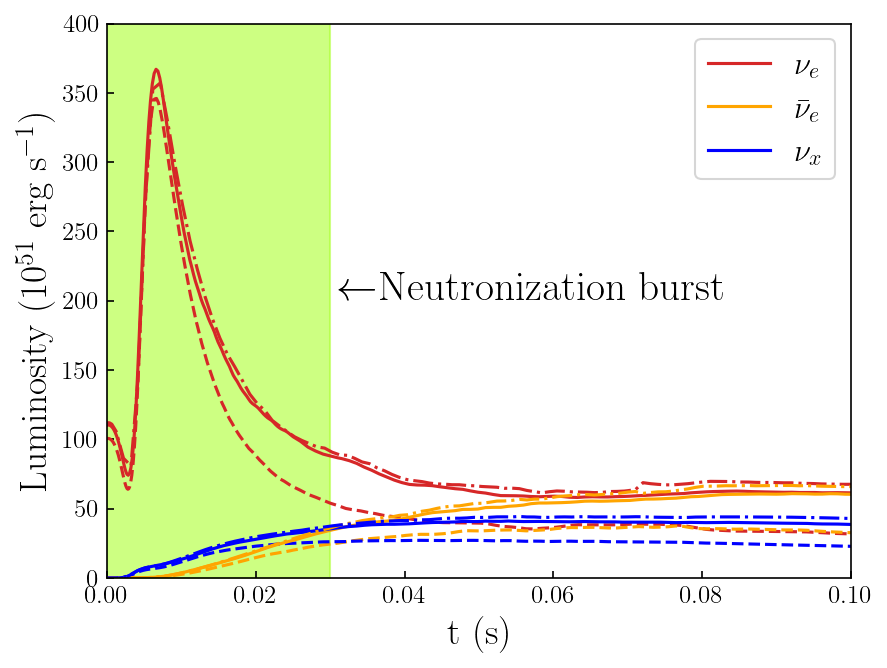

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.special import gamma
import math
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(dpi=150)


models = ['LS220-s11.2c','LS220-s27.0c','LS180-s40.0','LS220-s27.0co','Shen-s11.2c']
flavor = ['nue_bar','nue','nux']
nu_types = ['nubar_e','nu_e','nu_x']
label = [r'$\bar{\nu}_e$', r'$\nu_e$', r'$\nu_x$']

model = 0
t_data, E_data, E2_data, Lum_data, alpha_data = [],[],[],[],[]
for i in range(3):
    path = 'data/neutrinos-' + models[model] + '/neutrino_signal_'+ nu_types[i] + '-' + models[model] + '.data'
    data = np.loadtxt(path, skiprows=5)
    t = data[:,0]
    Lum = data[:,1]
    E = data[:,2]
    E2 = data[:,3]
    alpha = (2*E - E2)/(E2 - E**2)
    t_data.append(t)
    E_data.append(E)
    E2_data.append(E2)
    Lum_data.append(Lum)
    alpha_data.append(alpha)

plt.plot(t_data[1],Lum_data[1],'--',color='tab:red')
plt.plot(t_data[0],Lum_data[0],'--',color='orange')
plt.plot(t_data[2],Lum_data[2],'--',color='blue')

nu0_0 = interp1d(t_data[0],Lum_data[0])
nu1_0 = interp1d(t_data[1],Lum_data[1])
nu2_0 = interp1d(t_data[2],Lum_data[2])

model = 1
t_data, E_data, E2_data, Lum_data, alpha_data = [],[],[],[],[]
for i in range(3):
    path = 'data/neutrinos-' + models[model] + '/neutrino_signal_'+ nu_types[i] + '-' + models[model] + '.data'
    data = np.loadtxt(path, skiprows=5)
    t = data[:,0]
    Lum = data[:,1]
    E = data[:,2]
    E2 = data[:,3]
    alpha = (2*E - E2)/(E2 - E**2)
    t_data.append(t)
    E_data.append(E)
    E2_data.append(E2)
    Lum_data.append(Lum)
    alpha_data.append(alpha)

nu0_1 = interp1d(t_data[0],Lum_data[0])
nu1_1 = interp1d(t_data[1],Lum_data[1])
nu2_1 = interp1d(t_data[2],Lum_data[2])

plt.plot(t_data[1],Lum_data[1],'-',label=label[1],color='tab:red')
plt.plot(t_data[0],Lum_data[0],'-',label=label[0],color='orange')
plt.plot(t_data[2],Lum_data[2],'-',label=label[2],color='blue')

model = 2
t_data, E_data, E2_data, Lum_data, alpha_data = [],[],[],[],[]
for i in range(3):
    path = 'data/neutrinos-' + models[model] + '/neutrino_signal_'+ nu_types[i] + '-' + models[model] + '.data'
    data = np.loadtxt(path, skiprows=5)
    t = data[:,0]
    Lum = data[:,1]
    E = data[:,2]
    E2 = data[:,3]
    alpha = (2*E - E2)/(E2 - E**2)
    t_data.append(t)
    E_data.append(E)
    E2_data.append(E2)
    Lum_data.append(Lum)
    alpha_data.append(alpha)

nu0_1 = interp1d(t_data[0],Lum_data[0])
nu1_1 = interp1d(t_data[1],Lum_data[1])
nu2_1 = interp1d(t_data[2],Lum_data[2])

plt.plot(t_data[1],Lum_data[1],'-.',color='tab:red')
plt.plot(t_data[0],Lum_data[0],'-.',color='orange')
plt.plot(t_data[2],Lum_data[2],'-.',color='blue')

# t = np.linspace(0.03,1,101)
# plt.plot(t, nu0_0(t), 'k--',alpha=0.5)

# plt.plot(0.03*np.ones(101), np.linspace(0,500,101), 'gold',alpha=0.5)
# plt.fill_between(np.linspace(0.03,0.1,101), 400*np.ones(101), color='gray', alpha=0.3)
plt.fill_between(np.linspace(0,0.03,101), 400*np.ones(101), color='greenyellow', alpha=0.6)

plt.text(0.031,200,r'$\leftarrow $Neutronization burst',fontsize=20,color='k')

plt.xlim(0,0.1)
# plt.xlim(0.030,0.7)
# plt.xlim(0.7,7.6)
plt.ylim(0,400)
# plt.ylim(0,80)
# plt.ylim(0,15)
plt.xlabel(r't (s)', fontsize=18)
# plt.ylabel(r'$\frac{d^2\phi}{dtdE}$ (MeV$^{-1}$ cm$^{-2}$ s$^{-1}$)', fontsize=14)
plt.ylabel(r'Luminosity ($10^{51}$ erg s$^{-1}$)', fontsize=18)
plt.tick_params(direction='in', labelsize=12)
# plt.title('LS220-s27.0c')
# plt.yscale('log')
plt.legend(fontsize=15)
plt.savefig('plots/lumi-burst.pdf',dpi=160)
# plt.savefig('plots/plots_SNv2023/lumi-burst.png', transparent=True, dpi=160)
plt.show()

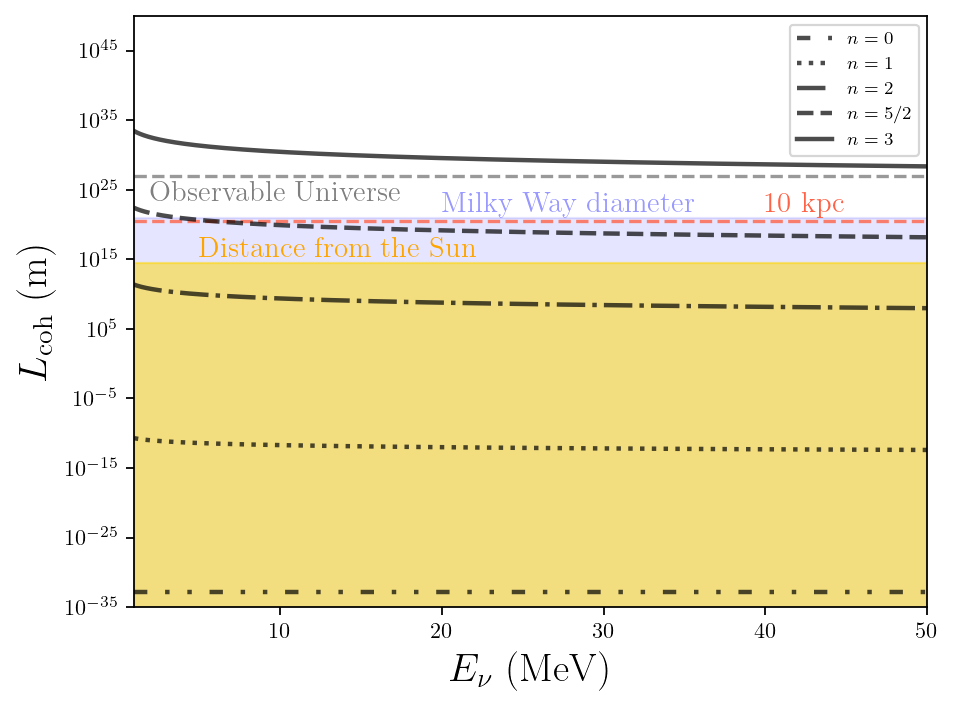

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#Enu=MeV, gamma=eV
def Lcoh(Enu, n):
    Enu = Enu*1e6 #eV
    xi_planck = 1e-2
    M_planck = 1.2e19 * 1e9/1 #eV
    L_planck = 1.6e-35 #m
    L = L_planck/xi_planck * (M_planck/Enu)**n
    return L

Ei,Ef,Li,Lf = 1e0,5e1, 1e0,1e30 #MeV and m
Enu = np.geomspace(Ei,Ef,301)

Lobs_univ = 8.8e26 #m
Lmw = 8.2696e+20 #m
L_10kpc = 3.086e20 #m
L_solar_s = 287.46e9 * 1e3 #m
ll = 2

plt.figure(dpi=160)

plt.plot(Enu, np.ones(len(Enu))*Lobs_univ, '--', c='grey',alpha=0.8)
plt.plot(Enu, np.ones(len(Enu))*L_10kpc, '--', c='tomato',alpha=0.8)

plt.text(40, L_10kpc+5e21, '10 kpc', fontsize=13, c='tomato', alpha=1)
plt.text(5, 2e15, 'Distance from the Sun', fontsize=13, c='orange', alpha=1)
plt.text(20, 8*Lmw, 'Milky Way diameter', fontsize=13, c='blue', alpha=0.4)
plt.text(2, Lobs_univ-8.797e26, 'Observable Universe', fontsize=13, c='grey', alpha=1)

plt.fill_between(Enu, np.ones(len(Enu))*Lmw, np.ones(len(Enu))*0, color='blue', alpha=0.1, hatch="")
plt.fill_between(Enu, np.ones(len(Enu))*L_solar_s, np.ones(len(Enu))*0, color='gold', alpha=0.5, hatch="")
# plt.fill_between(Enu, np.ones(len(Enu))*Lobs_univ, np.ones(len(Enu))*0, color='grey', alpha=0.15, hatch="")

plt.plot(Enu, Lcoh(Enu, 0),linestyle=(0, (3, 4, 1, 4, 1, 4)), lw=ll, c='k',label=r'$n=0$',alpha=0.7)
plt.plot(Enu, Lcoh(Enu, 1),':', lw=ll, c='k',label=r'$n=1$',alpha=0.7)
plt.plot(Enu, Lcoh(Enu, 2),'-.', lw=ll, c='k',label=r'$n=2$',alpha=0.7)
plt.plot(Enu, Lcoh(Enu, 5/2),'--', lw=ll, c='k',label=r'$n=5/2$',alpha=0.7)
plt.plot(Enu, Lcoh(Enu, 3),'-', lw=ll, c='k',label=r'$n=3$',alpha=0.7)

plt.yscale('log')
plt.ylim(1e-35,1e50)
plt.xlim(Ei,Ef)
plt.xlabel(r'$E_\nu$ (MeV)', fontsize=18)
plt.ylabel(r'$L_\mathrm{coh}$ (m)', fontsize=18)
plt.legend(fontsize=8)
# plt.savefig('plots/Lcoh.pdf',dpi=160)
plt.show()

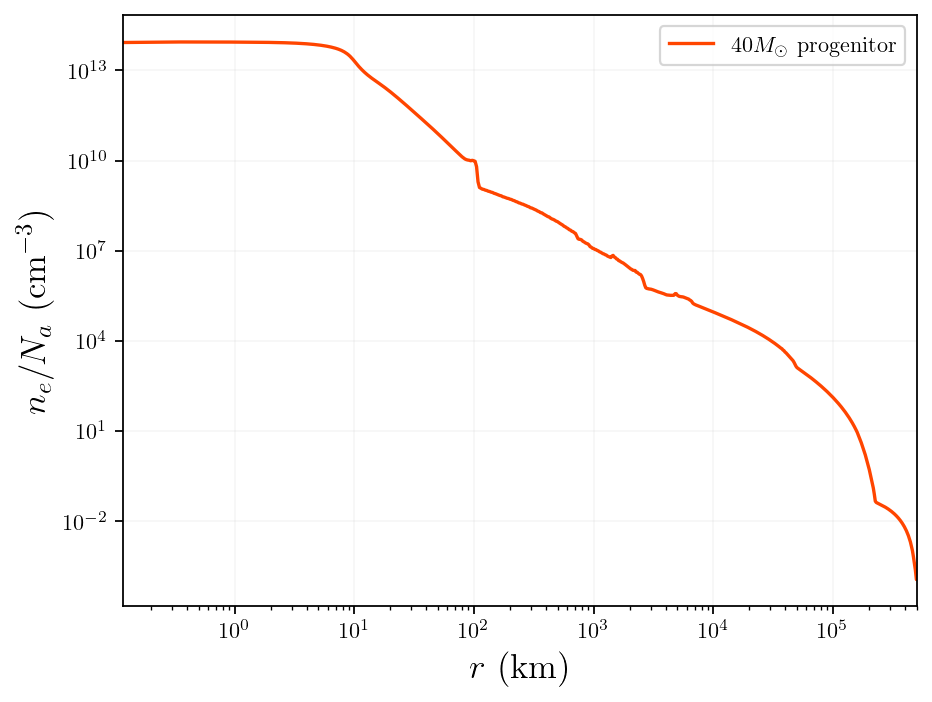

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig = plt.figure(dpi=160)

file2 = 'data/hydro-Huedepohl-1D-Accretion-ls180-s40.0-profiles-0.027s.txt'
# data = np.loadtxt(file1, delimiter=',', skiprows=4)
data = np.loadtxt(file2, delimiter=',', skiprows=4)
c = 2.99792458e8 #m/s
Gf = 1.16632e-23 #eV^-2
g_to_eV = c**2/1000 * 6.242e18
cm3_to_eV3 = (0.197e9*1e-15*100)**3
r_data = data[:,0]/100/1000 #km
rho = data[:,2]
Ye = data[:,6]
rho_nat = rho * g_to_eV * cm3_to_eV3 #eV^4
mn = (939.5656305188e6 + 938.2723404280e6)/2 #eV
ne = Ye*rho_nat/mn/(0.197e9*1e-15*100)**3 #cm^-3
Na = 6.022e23

plt.plot(r_data, ne/Na, c='orangered', label=r'$40 M_\odot$ progenitor')
plt.xlabel(r'$r$ (km)', fontsize=16)
plt.ylabel(r'$n_e/N_a$ (cm$^{-3}$)', fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.xlim(min(r_data), 5e5)
plt.legend()
plt.grid(alpha=0.1)
plt.savefig('plots/density_profile_40M.pdf',dpi=160)
plt.show()

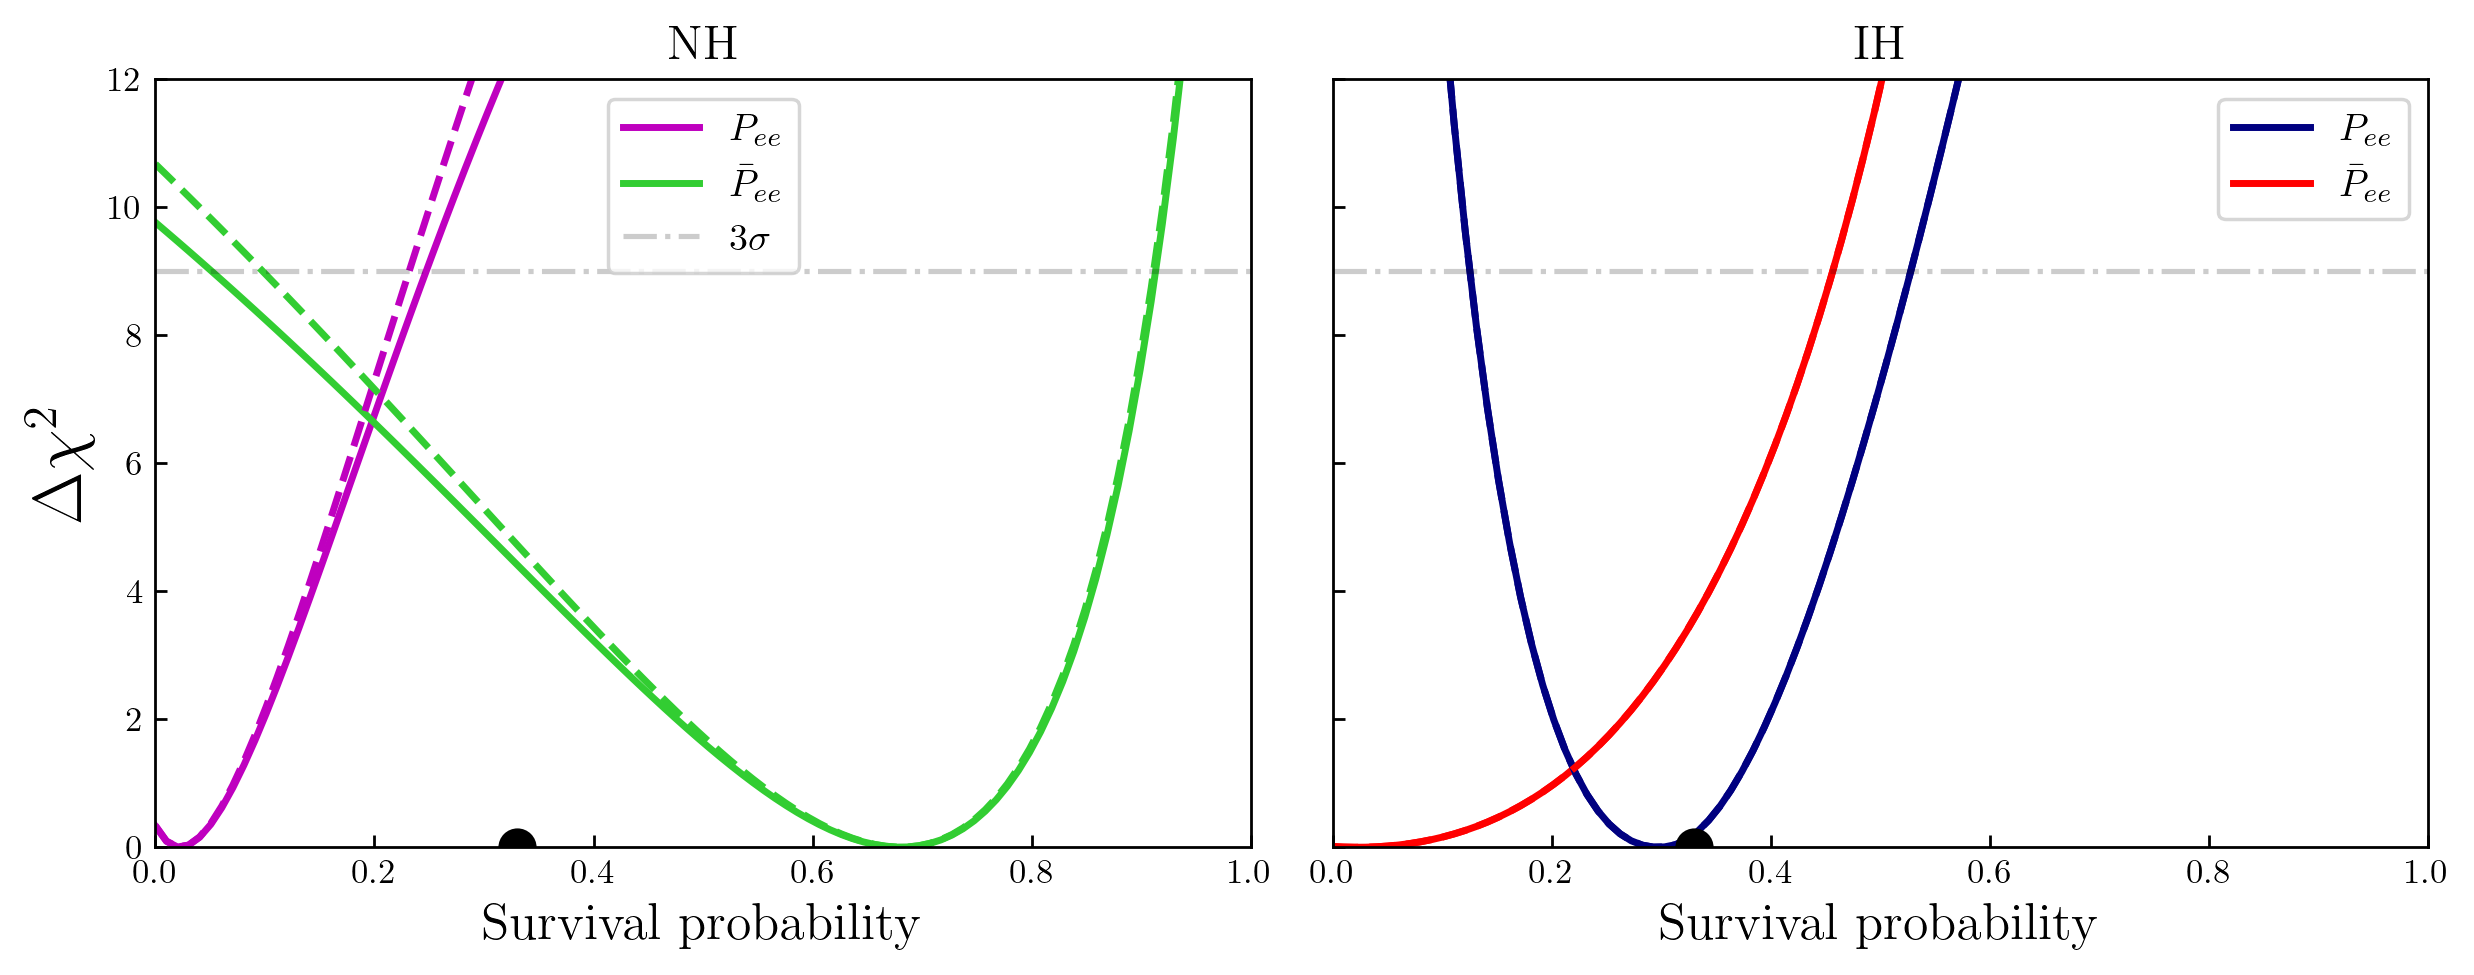

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from flavor_conversion import P_NH_nue, P_IH_nue, U3
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ax = plt.subplots(1,2,figsize=(10,4),dpi=250, sharey=True)

Peem_nh, chi_Peem_nh, ok = np.load('results/profile_LS220-s27.0c_Pee_10kpc_dune_hk_jn_NH_thetaz_0.npy')
Peemb_nh, chi_Peemb_nh, ok = np.load('results/profile_LS220-s27.0c_Pee_bar_10kpc_dune_hk_jn_NH_thetaz_0.npy')
Peem_nh_11, chi_Peem_nh_11, ok = np.load('results/profile_LS220-s11.2c_Pee_10kpc_dune_hk_jn_NH_thetaz_0.npy')
Peemb_nh_11, chi_Peemb_nh_11, ok = np.load('results/profile_LS220-s11.2c_Pee_bar_10kpc_dune_hk_jn_NH_thetaz_0.npy')

j = 0
min_c = min([min(chi_Peem_nh), min(chi_Peemb_nh)])
min_c_11 = min([min(chi_Peem_nh_11), min(chi_Peemb_nh_11)])
ax[j].plot(Peem_nh, chi_Peem_nh-min_c,'-', color='m', lw=2, label=r'$P_{ee}$')
ax[j].plot(Peemb_nh, chi_Peemb_nh-min_c,'-', color='limegreen', lw=2, label=r'$\bar{P}_{ee}$')
ax[j].plot(Peem_nh_11, chi_Peem_nh_11-min_c_11,'--', alpha=1, color='m',lw=2)
ax[j].plot(Peemb_nh_11, chi_Peemb_nh_11-min_c_11,'--',  alpha=1, color='limegreen',lw=2)

Peem_ih, chi_Peem_ih, ok = np.load('results/profile_LS220-s27.0c_Pee_10kpc_dune_hk_jn_IH_thetaz_0.npy')
Peemb_ih, chi_Peemb_ih, ok = np.load('results/profile_LS220-s27.0c_Pee_bar_10kpc_dune_hk_jn_IH_thetaz_0.npy')
Peem_ih_11, chi_Peem_ih_11, ok = np.load('results/profile_LS220-s11.2c_Pee_10kpc_dune_hk_jn_IH_thetaz_0.npy')
Peemb_ih_11, chi_Peemb_ih_11, ok = np.load('results/profile_LS220-s11.2c_Pee_bar_10kpc_dune_hk_jn_IH_thetaz_0.npy')

# plt.title(r'DUNE ($\nu_e-$Ar) + HK ($\nu-e^{-}$ + IBD) (SN at 10 kpc)',fontsize=13)
i = 1

min_c = min([min(chi_Peem_ih), min(chi_Peem_ih)])
min_c_11 = min([min(chi_Peem_ih_11), min(chi_Peem_ih_11)])
ax[i].plot(Peem_ih, chi_Peem_ih-min_c,'-', color='navy', lw=2, label=r'$P_{ee}$')
ax[i].plot(Peemb_ih, chi_Peemb_ih-min_c,'-', color='red', lw=2, label=r'$\bar{P}_{ee}$')
ax[i].plot(Peem_ih_11, chi_Peem_ih_11-min_c_11,'--', alpha=1, color='navy',lw=2)
ax[i].plot(Peemb_ih_11, chi_Peemb_ih_11-min_c_11,'--',  alpha=1, color='red',lw=2)

ax[i].plot(0.33,0,'ko',markersize=10)
# ax[i].set_xlabel(r'$P_{ee}$', fontsize=20)
ax[j].set_ylabel(r'$\Delta\chi^2$', fontsize=20)
ax[j].plot(Peem_nh, np.ones(len(Peem_nh))*(chi2.ppf(0.997300203936740, 1)), 'k-.', label=r'$3\sigma$', alpha=0.2)
ax[i].set_ylim(0,12)
ax[i].set_xlim(0,1)
ax[i].legend(fontsize=11)
ax[i].tick_params(direction='in')

ax[j].set_title('NH', fontsize=14)
ax[i].set_title('IH', fontsize=14)
ax[j].plot(0.33,0,'ko',markersize=10)
ax[j].set_xlabel(r'Survival probability', fontsize=15)
ax[i].set_xlabel(r'Survival probability', fontsize=15)
# ax[j].set_ylabel(r'$\Delta\chi^2$', fontsize=20)
ax[i].plot(Peem_nh, np.ones(len(Peem_nh))*(chi2.ppf(0.997300203936740, 1)), 'k-.', alpha=0.2)
ax[j].set_ylim(0,12)
ax[j].set_xlim(0,1)
ax[j].legend(fontsize=11,loc='upper center')
ax[j].tick_params(direction='in')

plt.tight_layout()
plt.savefig('plots/Pee-profile.pdf',dpi=250)
plt.show()

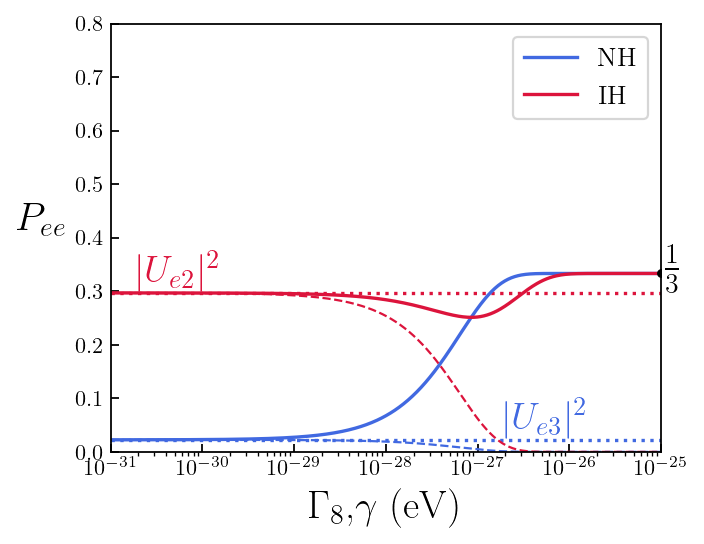

In [ ]:
from importlib import reload
import flavor_conversion
reload(flavor_conversion)
import matplotlib.pyplot as plt
import numpy as np
from flavor_conversion import Pee_msc_vacuum_E, Pee_deco_vac_basis_loss_E, Pee_msc_non_diag_vacuum_E
from flavor_conversion import U3
import math
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig = plt.figure(dpi=160, figsize=(4.5,3.5))
# ax = fig.add_subplot(111)
# for axis in ['top', 'bottom', 'left', 'right']:
#     ax.spines[axis].set_linewidth(1)

theta12 = 33.45 #+0.77 -0.75 NuFIT 2021 https://arxiv.org/pdf/2111.03086.pdf
theta12 = theta12*math.pi/180
D_kpc = 10 #kpc
gamma3_nat = 1e-55 #eV
gamma0_nat = gamma3_nat
gamma8_nat = gamma3_nat
gamma_nat_list = np.geomspace(1e-31,1e-25,501)
gamma8_nat_list = np.geomspace(1e-31,1e-25,501)
P1e = U3[0][0]**2
P2e = U3[0][1]**2
P3e = U3[0][2]**2
Pei_vec = P1e,P2e,P3e

color2 = 'crimson'

plt.plot(gamma8_nat_list, np.ones(len(gamma8_nat_list))*U3[0][2]**2,':',color='royalblue')#, lw=2, label=r'NH (Standard)')
plt.plot(gamma8_nat_list, np.ones(len(gamma8_nat_list))*U3[0][1]**2,':',color=color2)#, lw=2, label=r'IH (Standard)')

n = 0
E = 1
plt.plot(gamma8_nat_list, Pee_msc_vacuum_E(n, E, D_kpc, gamma3_nat, gamma8_nat_list, theta12, 'NH'), '-', label=r'NH', color='royalblue')
plt.plot(gamma8_nat_list, Pee_msc_vacuum_E(n, E, D_kpc, gamma3_nat, gamma8_nat_list, theta12, 'IH'), '-', label=r'IH', color=color2)

plt.plot(gamma8_nat_list, Pee_deco_vac_basis_loss_E(n, E, D_kpc, gamma_nat_list, theta12, 'NH'), '--', lw=1, color='royalblue')
plt.plot(gamma8_nat_list, Pee_deco_vac_basis_loss_E(n, E, D_kpc, gamma_nat_list, theta12, 'IH'), '--', lw=1, color=color2)

theta12 = 33.45 # +0.77 -0.75 NuFIT 2021 https://arxiv.org/pdf/2111.03086.pdf
theta13 = 8.62 # +-0.12 NuFIT 2021 https://arxiv.org/pdf/2111.03086.pdf
theta12 = theta12*math.pi/180
theta13 = theta13*math.pi/180
c12=np.cos(theta12)
s12=np.sin(theta12)
c13=np.cos(theta13)
s13=np.sin(theta13)

plt.text(1.1e-25, 1/3-0.01,r'$\frac{1}{3}$', fontsize=18)
# plt.text(2e-31, U3[0][1]**2+0.01 ,r'$\sin^2{\theta_{12}} \cos^2{\theta_{13}}$', fontsize=17, color='tab:orange')
# plt.text(2e-27, U3[0][2]**2+0.01 ,r'$\sin^2{\theta_{13}}$', fontsize=17, color='royalblue')
plt.text(2e-31, U3[0][1]**2+0.02 ,r'$|U_{e2}|^2$', fontsize=17, color=color2)
plt.text(2e-27, U3[0][2]**2+0.02 ,r'$|U_{e3}|^2$', fontsize=17, color='royalblue')
plt.plot(1e-25,1/3,'k.')

plt.xscale('log')
plt.legend(fontsize=12)
plt.ylim(0.0,0.8)
plt.xlim(1e-31,1e-25)
plt.xlabel('$\Gamma_8$,$\gamma$ (eV)', fontsize=18)
plt.ylabel('$P_{ee}$', fontsize=18, rotation=0, labelpad=15)
# plt.tick_params(direction='in', labelsize=12)
plt.tick_params(direction='in')
plt.tight_layout()
# plt.savefig('plots/Pee-QD.pdf', dpi=160)
# plt.savefig('plots/plots_SNv2023/Pee-QD.png', transparent=True, dpi=160)
plt.show()

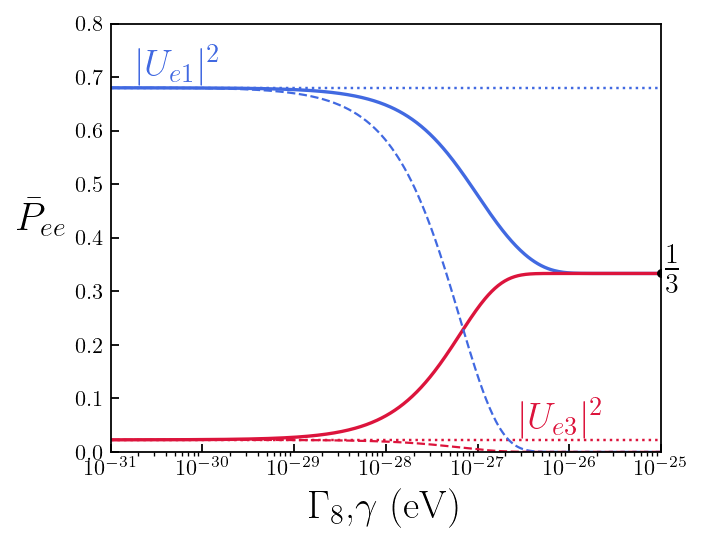

In [ ]:
from importlib import reload
import flavor_conversion
reload(flavor_conversion)
import matplotlib.pyplot as plt
import numpy as np
from flavor_conversion import Pee_bar_msc_vacuum_E, Pee_bar_deco_vac_basis_loss_E, Pee_bar_msc_non_diag_vacuum_E
from flavor_conversion import U3
import math
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(dpi=160, figsize=(4.5,3.5))

theta12 = 33.45 #+0.77 -0.75 NuFIT 2021 https://arxiv.org/pdf/2111.03086.pdf
theta12 = theta12*math.pi/180
D_kpc = 10 #kpc
gamma3_nat = 1e-30 #eV
gamma0_nat = gamma3_nat
gamma8_nat = gamma3_nat
gi,gf = -55,-35
gamma_nat_list = np.geomspace(1e-31,1e-25,501)
gamma8_nat_list = np.geomspace(1e-31,1e-25,501)
P1e = U3[0][0]**2
P2e = U3[0][1]**2
P3e = U3[0][2]**2
Pei_vec = P1e,P2e,P3e

color2 = 'crimson'

plt.plot(gamma8_nat_list, np.ones(len(gamma8_nat_list))*U3[0,0]**2,':', lw=1.1, color='royalblue')#, lw=2, label=r'NH (Standard)')
plt.plot(gamma8_nat_list, np.ones(len(gamma8_nat_list))*U3[0,2]**2,':', lw=1.1, color=color2)#, lw=2, label=r'IH (Standard)')


n = 0
E = 0
plt.plot(gamma8_nat_list, Pee_bar_msc_vacuum_E(n, E, D_kpc, gamma3_nat, gamma8_nat_list, theta12, 'NH'), '-', label=r'NH', color='royalblue')
plt.plot(gamma8_nat_list, Pee_bar_msc_vacuum_E(n, E, D_kpc, gamma3_nat, gamma8_nat_list, theta12, 'IH'), '-', label=r'IH', color=color2)

plt.plot(gamma8_nat_list, Pee_bar_deco_vac_basis_loss_E(n, E, D_kpc, gamma_nat_list, theta12, 'NH'), '--', lw=1, color='royalblue')
plt.plot(gamma8_nat_list, Pee_bar_deco_vac_basis_loss_E(n, E, D_kpc, gamma_nat_list, theta12, 'IH'), '--', lw=1, color=color2)

theta12 = 33.45 # +0.77 -0.75 NuFIT 2021 https://arxiv.org/pdf/2111.03086.pdf
theta13 = 8.62 # +-0.12 NuFIT 2021 https://arxiv.org/pdf/2111.03086.pdf
theta12 = theta12*math.pi/180
theta13 = theta13*math.pi/180
c12=np.cos(theta12)
s12=np.sin(theta12)
c13=np.cos(theta13)
s13=np.sin(theta13)

plt.text(1.1e-25, 1/3-0.01,r'$\frac{1}{3}$', fontsize=18)
# plt.text(2e-31, U3[0][1]**2+0.01 ,r'$\sin^2{\theta_{12}} \cos^2{\theta_{13}}$', fontsize=17, color='tab:orange')
# plt.text(2e-27, U3[0][2]**2+0.01 ,r'$\sin^2{\theta_{13}}$', fontsize=17, color='royalblue')
plt.text(2e-31, U3[0,0]**2+0.02 ,r'$|U_{e1}|^2$', fontsize=17, color='royalblue')
plt.text(3e-27, U3[0,2]**2+0.02 ,r'$|U_{e3}|^2$', fontsize=17, color='crimson')
plt.plot(1e-25,1/3,'k.')

plt.xscale('log')
# plt.legend(fontsize=12)
plt.ylim(0.0,0.8)
plt.xlim(1e-31,1e-25)
plt.xlabel('$\Gamma_8$,$\gamma$ (eV)', fontsize=18)
# plt.ylabel('$\stackrel{-}{P}_{ee}$', fontsize=18, rotation=0, labelpad=15)
plt.ylabel('$\\bar{P}_{ee}$', fontsize=18, rotation=0, labelpad=15)
# plt.tick_params(direction='in', labelsize=12)
plt.tick_params(direction='in')
plt.tight_layout()
# plt.savefig('plots/Pee-bar-QD.pdf', dpi=160)
# plt.savefig('plots/plots_SNv2023/Pee-bar-QD.png', transparent=True, dpi=160)
plt.show()

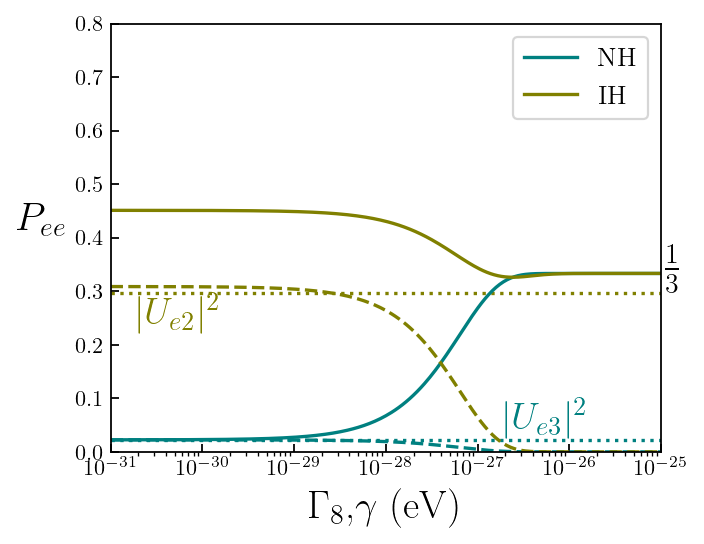

In [ ]:
from importlib import reload
import flavor_conversion
reload(flavor_conversion)
import matplotlib.pyplot as plt
import numpy as np
from flavor_conversion import P_combined_msc_E, P_combined_loss_E
from flavor_conversion import U3
import math
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(dpi=160, figsize=(4.5,3.5))

Deltam21 = 7.42e-5 #eV² +0.21 -0.20
theta12 = 33.45 #+0.77 -0.75 NuFIT 2021 https://arxiv.org/pdf/2111.03086.pdf
theta12 = theta12*math.pi/180
D_kpc = 10 #kpc
gamma3_nat = 1e-27 #eV
gamma0_nat = gamma3_nat
gamma8_nat = gamma3_nat
gamma0_nat_list = np.geomspace(1e-40,1e-1,501)
gamma8_nat_list = np.geomspace(1e-31,1e-25,301)
P1e = U3[0][0]**2
P2e = U3[0][1]**2
P3e = U3[0][2]**2
Pei_vec = P1e,P2e,P3e
oscil_par = theta12, Deltam21
thetaz = 180
E = 30 #MeV
Peec_list_nh, Peec_list_ih, Peec_loss_list_nh, Peec_loss_list_ih = [],[],[],[]

plt.plot(gamma8_nat_list, np.ones(len(gamma8_nat_list))*U3[0][2]**2,':',color='teal')#, lw=2, label=r'NH (Standard)')
plt.plot(gamma8_nat_list, np.ones(len(gamma8_nat_list))*U3[0][1]**2,':',color='olive')#, lw=2, label=r'IH (Standard)')

n = 0
sn_matter = 'no'

for g8 in gamma8_nat_list:
    Peec_nh,_ = P_combined_msc_E(n, D_kpc, E, gamma3_nat, g8, 'NH', thetaz, oscil_par, 'DUNE')
    Peec_ih,_ = P_combined_msc_E(n, D_kpc, E, gamma3_nat, g8, 'IH', thetaz, oscil_par, 'DUNE')
    Peec_loss_nh = P_combined_loss_E(n, D_kpc, E, g8, 'NH', thetaz, oscil_par, 'DUNE')[0]
    Peec_loss_ih = P_combined_loss_E(n, D_kpc, E, g8, 'IH', thetaz, oscil_par, 'DUNE')[0]
    Peec_list_nh.append(Peec_nh[0][0])
    Peec_list_ih.append(Peec_ih[0][0])
    Peec_loss_list_nh.append(Peec_loss_nh)
    Peec_loss_list_ih.append(Peec_loss_ih[0][0])

plt.plot(gamma8_nat_list, Peec_list_nh, '-', label=r'NH', color='teal')
plt.plot(gamma8_nat_list, Peec_list_ih, '-', label=r'IH', color='olive')

plt.plot(gamma8_nat_list, Peec_loss_list_nh, '--', color='teal')
plt.plot(gamma8_nat_list, Peec_loss_list_ih, '--', color='olive')

# np.save('results/Peec_nh_ih_nhloss_ihloss_regen_thetaz_%i.npy'%thetaz, [Peec_list_nh, Peec_list_ih, Peec_loss_list_nh, Peec_loss_list_ih])

theta12 = 33.45 # +0.77 -0.75 NuFIT 2021 https://arxiv.org/pdf/2111.03086.pdf
theta13 = 8.62 # +-0.12 NuFIT 2021 https://arxiv.org/pdf/2111.03086.pdf
theta12 = theta12*math.pi/180
theta13 = theta13*math.pi/180
c12=np.cos(theta12)
s12=np.sin(theta12)
c13=np.cos(theta13)
s13=np.sin(theta13)

plt.text(1.1e-25, 1/3-0.01,r'$\frac{1}{3}$', fontsize=18)
# plt.text(2e-31, U3[0][1]**2+0.01 ,r'$\sin^2{\theta_{12}} \cos^2{\theta_{13}}$', fontsize=17, color='tab:orange')
# plt.text(2e-27, U3[0][2]**2+0.01 ,r'$\sin^2{\theta_{13}}$', fontsize=17, color='royalblue')
plt.text(2e-31, U3[0][1]**2-0.06 ,r'$|U_{e2}|^2$', fontsize=17, color='olive')
plt.text(2e-27, U3[0][2]**2+0.02 ,r'$|U_{e3}|^2$', fontsize=17, color='teal')

# plt.title(r'$\theta_z =$ %i$^o$'%thetaz)
plt.xscale('log')
plt.legend(fontsize=12)
plt.ylim(0.0,0.8)
plt.xlim(1e-31,1e-25)
plt.xlabel('$\Gamma_8$,$\gamma$ (eV)', fontsize=18)
plt.ylabel('$P_{ee}$', fontsize=18, rotation=0, labelpad=15)
plt.tick_params(direction='in')
plt.tight_layout()
plt.savefig('plots/Pee-combined-QD-regen-thetaz-%i-%iMeV.pdf'%(thetaz, E), dpi=160)
plt.show()

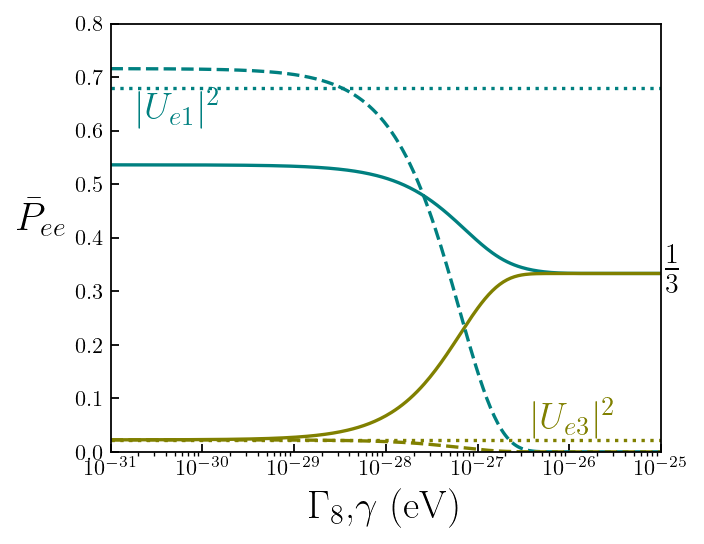

In [ ]:
from importlib import reload
import flavor_conversion
reload(flavor_conversion)
import matplotlib.pyplot as plt
import numpy as np
from flavor_conversion import P_combined_msc_E, P_combined_loss_E
from flavor_conversion import U3
import math
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(dpi=160, figsize=(4.5,3.5))

Deltam21 = 7.42e-5 #eV² +0.21 -0.20
theta12 = 33.45 #+0.77 -0.75 NuFIT 2021 https://arxiv.org/pdf/2111.03086.pdf
theta12 = theta12*math.pi/180
D_kpc = 10 #kpc
gamma3_nat = 1e-27 #eV
gamma0_nat = gamma3_nat
gamma8_nat = gamma3_nat
gamma0_nat_list = np.geomspace(1e-40,1e-1,501)
gamma8_nat_list = np.geomspace(1e-31,1e-25,301)
P1e = U3[0][0]**2
P2e = U3[0][1]**2
P3e = U3[0][2]**2
Pei_vec = P1e,P2e,P3e
oscil_par = theta12, Deltam21
thetaz = 180
E = 30 #MeV
Peec_list_nh, Peec_list_ih, Peec_loss_list_nh, Peec_loss_list_ih = [],[],[],[]

plt.plot(gamma8_nat_list, np.ones(len(gamma8_nat_list))*U3[0][0]**2,':',color='teal')#, lw=2, label=r'NH (Standard)')
plt.plot(gamma8_nat_list, np.ones(len(gamma8_nat_list))*U3[0][2]**2,':',color='olive')#, lw=2, label=r'IH (Standard)')

n = 0
sn_matter = 'no'

for g8 in gamma8_nat_list:
    _,Peec_nh = P_combined_msc_E(n, D_kpc, E, gamma3_nat, g8, 'NH', thetaz, oscil_par, 'HK')
    _,Peec_ih = P_combined_msc_E(n, D_kpc, E, gamma3_nat, g8, 'IH', thetaz, oscil_par, 'HK')
    Peec_loss_nh = P_combined_loss_E(n, D_kpc, E, g8, 'NH', thetaz, oscil_par, 'HK')[1]
    Peec_loss_ih = P_combined_loss_E(n, D_kpc, E, g8, 'IH', thetaz, oscil_par, 'HK')[1]
    Peec_list_nh.append(Peec_nh[0][0])
    Peec_list_ih.append(Peec_ih[0][0])
    Peec_loss_list_nh.append(Peec_loss_nh[0][0])
    Peec_loss_list_ih.append(Peec_loss_ih)

plt.plot(gamma8_nat_list, Peec_list_nh, '-', label=r'NH', color='teal')
plt.plot(gamma8_nat_list, Peec_list_ih, '-', label=r'IH', color='olive')

plt.plot(gamma8_nat_list, Peec_loss_list_nh, '--', color='teal')
plt.plot(gamma8_nat_list, Peec_loss_list_ih, '--', color='olive')

# np.save('results/Peec_nh_ih_nhloss_ihloss_regen_thetaz_%i.npy'%thetaz, [Peec_list_nh, Peec_list_ih, Peec_loss_list_nh, Peec_loss_list_ih])

theta12 = 33.45 # +0.77 -0.75 NuFIT 2021 https://arxiv.org/pdf/2111.03086.pdf
theta13 = 8.62 # +-0.12 NuFIT 2021 https://arxiv.org/pdf/2111.03086.pdf
theta12 = theta12*math.pi/180
theta13 = theta13*math.pi/180
c12=np.cos(theta12)
s12=np.sin(theta12)
c13=np.cos(theta13)
s13=np.sin(theta13)

plt.text(1.1e-25, 1/3-0.01,r'$\frac{1}{3}$', fontsize=18)
# plt.text(2e-31, U3[0][1]**2+0.01 ,r'$\sin^2{\theta_{12}} \cos^2{\theta_{13}}$', fontsize=17, color='tab:orange')
# plt.text(2e-27, U3[0][2]**2+0.01 ,r'$\sin^2{\theta_{13}}$', fontsize=17, color='royalblue')
plt.text(2e-31, U3[0][0]**2-0.06 ,r'$|U_{e1}|^2$', fontsize=17, color='teal')
plt.text(4e-27, U3[0][2]**2+0.02 ,r'$|U_{e3}|^2$', fontsize=17, color='olive')

# plt.title(r'$\theta_z =$ %i$^o$'%thetaz)
plt.xscale('log')
# plt.legend(fontsize=12)
plt.ylim(0.0,0.8)
plt.xlim(1e-31,1e-25)
plt.xlabel('$\Gamma_8$,$\gamma$ (eV)', fontsize=18)
plt.ylabel('$\\bar{P}_{ee}$', fontsize=18, rotation=0, labelpad=15)
plt.tick_params(direction='in')
plt.tight_layout()
plt.savefig('plots/Pee_bar-combined-QD-regen-thetaz-%i-%iMeV.pdf'%(thetaz, E), dpi=160)
plt.show()

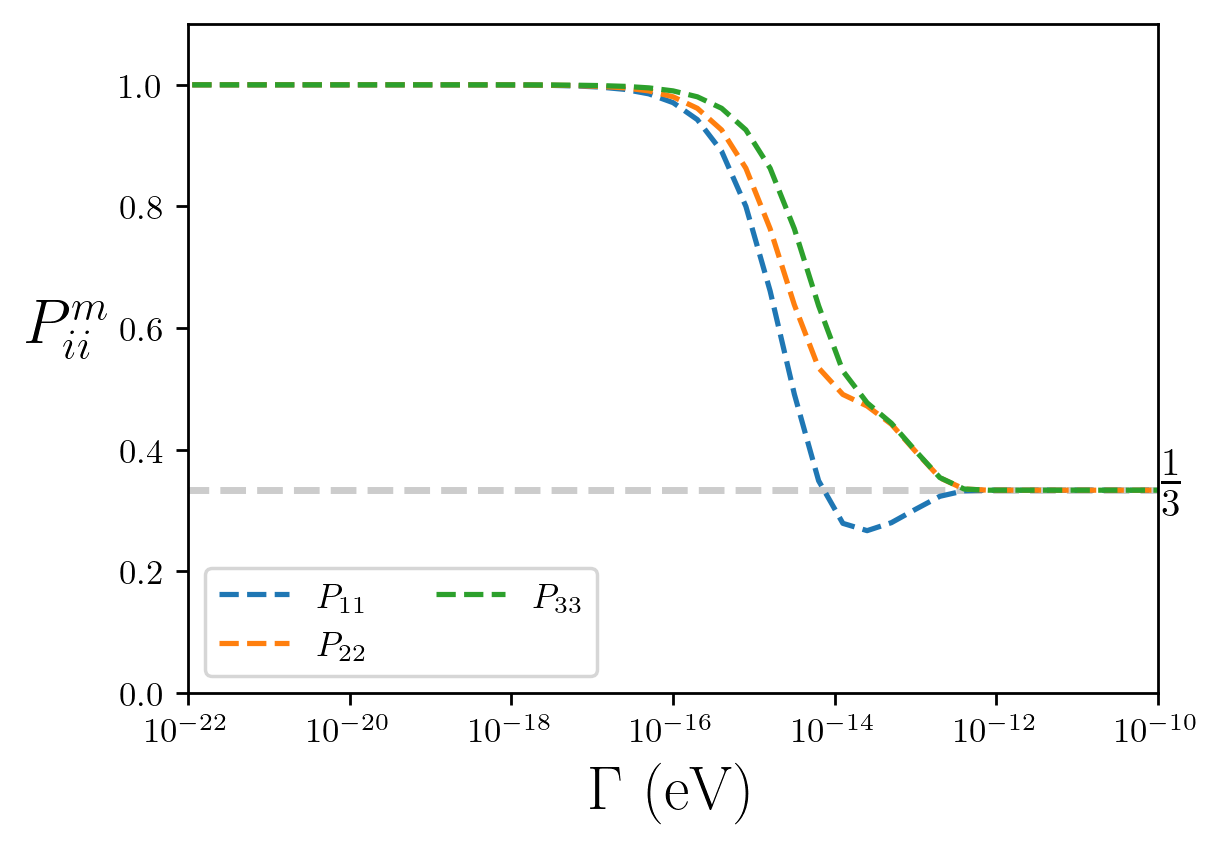

In [ ]:
from importlib import reload
import flavor_conversion
reload(flavor_conversion)
from flavor_conversion import Pij_conserved_E_interps_func
import numpy as np
import matplotlib.pyplot as plt

import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

fig, axes = plt.subplots(1, 1, figsize=(5,3.5), dpi=250, sharey=True)
fig.subplots_adjust(wspace=0.09)

gamma = 1e-9
gamma_list = np.geomspace(1e-40,1e-10,101)
E = 10
# P = Pij_conserved_E_interps_func(n,E,gamma,'11','NH','nue')
n = 0
n_list = [0,2,2.5]
n_list = [0]
hier_list = ['NH','IH']
nue_list = ['nue','nuebar']
ij_list = ['11','12','13','21','22','23','31','32','33']
ij_list = ['11','22','33']
nue_list = ['nue']
hier_list = ['NH']

i = 0
ls = '--'
lw = 1.5

for hier in hier_list:
    ax = axes
    if i == 0:
        ax.text(1.1e-10, 1/3-0.01,r'$\frac{1}{3}$', fontsize=16)
    ax.plot(gamma_list, np.ones(len(gamma_list))*1/3,'k--',lw=2,alpha=0.2)
    for nue in nue_list:
        for ij in ij_list:
            ax.plot(gamma_list, Pij_conserved_E_interps_func(n,E,gamma_list,ij,hier,nue), linestyle=ls, label=r'$P_{%s}$'%ij, lw=lw)
    ax.legend(ncol=2)
    ax.set_ylim(0,1.1)
    ax.set_xlabel(r'$\Gamma$ (eV)', fontsize=18)
    if i == 0:
        ax.set_ylabel(r'$P_{ii}^m$', fontsize=18, rotation=0, labelpad=15)
    ax.set_xscale('log')
    ax.set_xlim(1e-22,1e-10)
    # i += 1
plt.tight_layout()
plt.savefig('plots/Pii_sn_conserved_n0.pdf',dpi=160)
plt.show()

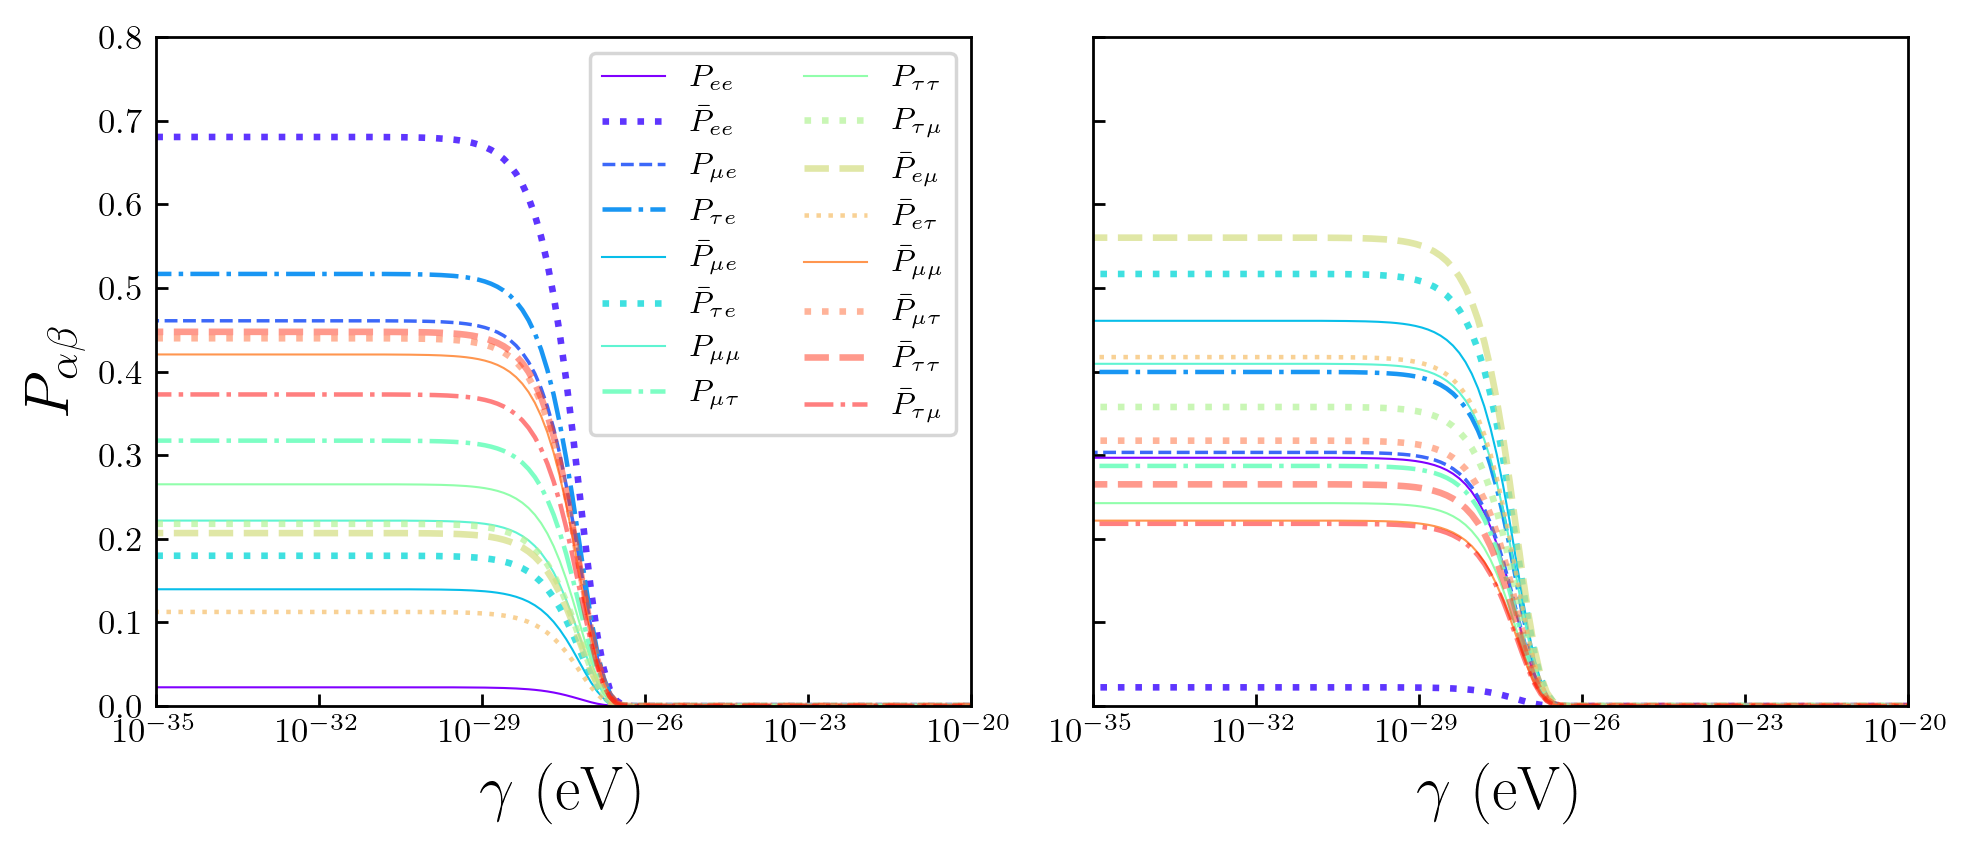

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from flavor_conversion import Pab_vacuum_nu_loss_E
import math
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# plt.figure(dpi=160, figsize=(4.5,3.5))
fig, ax = plt.subplots(1, 2, figsize=(8,3.5), dpi=250, sharey=True)
# fig.subplots_adjust(wspace=0.09)
theta12 = 33.45 #+0.77 -0.75 NuFIT 2021 https://arxiv.org/pdf/2111.03086.pdf
theta12 = theta12*math.pi/180
g = np.geomspace(1e-70,1e-1,601)
hier_list = ['NH','IH']

labels = ['P_{ee}', '\\bar{P}_{ee}', 'P_{\mu e}', 'P_{\\tau e}', '\\bar{P}_{\mu e}', '\\bar{P}_{\\tau e}', 'P_{\mu\mu}', 'P_{\mu\\tau}', 'P_{\\tau\\tau}', 'P_{\\tau\mu}', '\\bar{P}_{e \mu}', '\\bar{P}_{e \\tau}', '\\bar{P}_{\mu\mu}', '\\bar{P}_{\mu\\tau}', '\\bar{P}_{\\tau\\tau}', '\\bar{P}_{\\tau\mu}']

for ll in range(len(ax)):
    hier = hier_list[ll]
    pt = Pab_vacuum_nu_loss_E(0,10,10,g,theta12,hier)
    i = 0
    color = iter(cm.rainbow(np.linspace(0, 1, len(labels))))
    n = len(labels)
    l_list = ['-',':','--','-.']
    k = 0

    for p in pt:
        try:
            l = l_list[k]
        except:
            k = 0
            l = l_list[k]
        k += 1

        if i > int(n/4) and i < int(n/2):
            alpha = 0.9
        elif i > int(n/2) and i < int(3*n/4):
            alpha = 0.7
        elif i > int(3*n/4):
            alpha = 0.5
        else:
            alpha = 1

        if l == '-':
            lw = 0.6
        elif l == '-.':
            lw = 1.3
        elif l == '-.':
            lw = 1.6
        elif l == ':':
            lw = 1.9
        
        if labels[i] == 'P_{\mu e}':
            lw = 1
        if labels[i] == 'P_{\mu\mu}':
            l = '-'
            lw = 0.6
        if labels[i] == '\\bar{P}_{e \\tau}':
            l = ':'

        c = next(color)
        ax[ll].plot(g, p, label=r'$%s$'%labels[i], linestyle=l, c=c, lw=lw, alpha=alpha)
        i+=1

    ax[ll].set_ylim(0,0.8)
    ax[ll].set_xlim(1e-35,1e-20)
    # plt.xlim(1e-45, 1e-39)
    ax[ll].set_xscale('log')
    ax[ll].set_xlabel(r'$\gamma$ (eV)', fontsize=18)
    ax[ll].tick_params(direction='in')
ax[0].legend(ncol=2, fontsize=9)
ax[0].set_ylabel(r'$P_{\alpha\beta}$', fontsize=18)
plt.tight_layout()
plt.savefig('plots/Pab_loss_with_superposition_mu_tau.pdf',dpi=160)
plt.show()

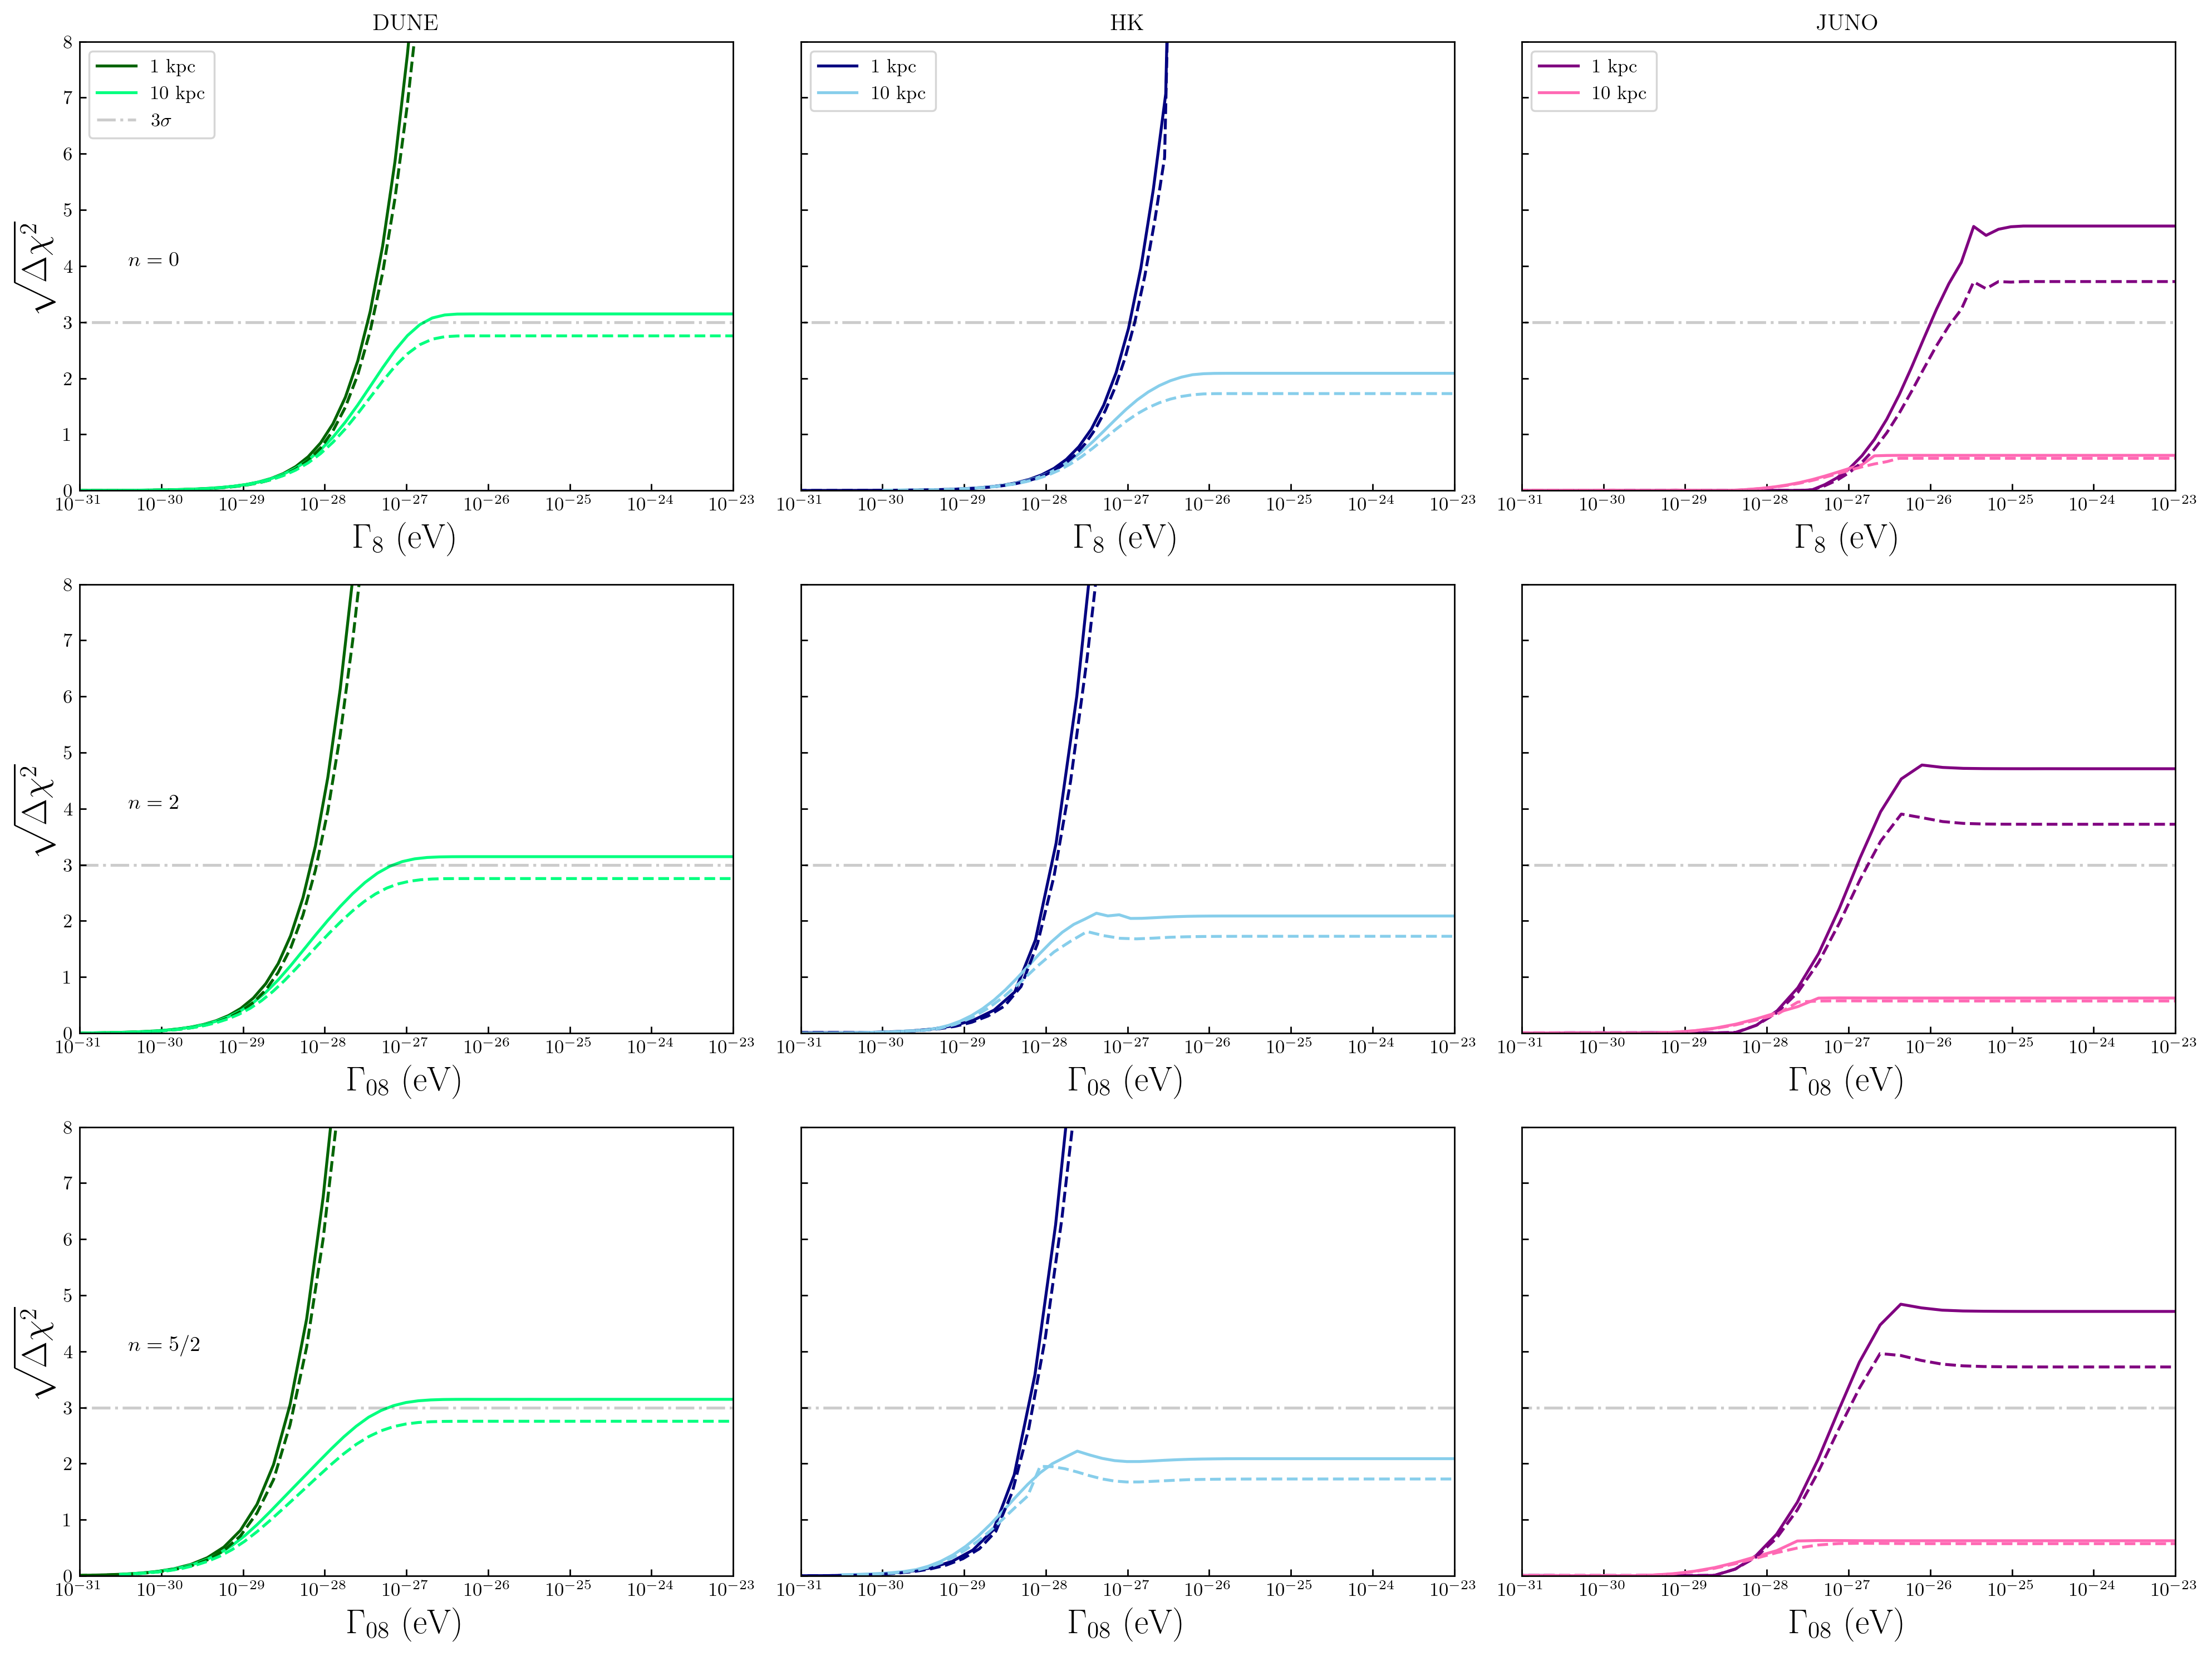

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from matplotlib import cm
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
from scipy.stats import chi2
from numpy import sqrt

theta12 = 33.45 #+0.77 -0.75 NuFIT 2021 https://arxiv.org/pdf/2111.03086.pdf
theta13 = 8.62  #+-0.12 NuFIT 2021 https://arxiv.org/pdf/2111.03086.pdf
theta23 = 49.2 #+1.0 -1.3 NuFIT 2021 https://arxiv.org/pdf/2111.03086.pdf
theta12 = theta12*pi/180
theta13 = theta13*pi/180
theta23 = theta23*pi/180
c12=np.cos(theta12)
s12=np.sin(theta12)
c13=np.cos(theta13)
s13=np.sin(theta13)
c23=np.cos(theta23)
s23=np.sin(theta23)

U23 = np.array([ [1,0,0],[0,c23,s23],[0,-s23,c23] ])
U13 = np.array([ [c13,0,s13],[0,1,0],[-s13,0,c13] ])
U12 = np.array([ [c12,s12,0],[-s12,c12,0],[0,0,1] ])
U3 = U23 @ U13 @ U12

fig, ax = plt.subplots(3, 3, figsize=(16,12), dpi=250, sharey=True)
fig.subplots_adjust(wspace=0.09)
n_e_list = ['','_E','_E_2.5']
xlim_list = [(1e-31,1e-23),(1e-31,1e-23),(1e-31,1e-23)]
# xlim_list = [(1e-30,1e-23),(1e-30,1e-23),(1e-30,1e-23)]
n_list = [r'$n = 0$',r'$n = 2$',r'$n = 5/2$']
n_pos = [(4e-31,4),(4e-31,4),(4e-31,4)]
label_list = [r'$\Gamma_8$ (eV)',r'$\Gamma_{08}$ (eV)',r'$\Gamma_{08}$ (eV)']

n_list_value = [0,2,5/2]
E0 = 10e6

for i in range(len(ax)):
    n_e = n_e_list[i]
    ax1,ax2,ax3 = ax[i]
    n = n_list_value[i]
    paleta = ['darkgreen','mediumseagreen','limegreen','springgreen', 'aquamarine']
    g_1, c_1,_ = np.load('results/profile_g8_exp_LS220_s27.0c_1.0kpc_dune_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_5, c_5,_ = np.load('results/profile_g8_exp_LS220_s27.0c_5.0kpc_dune_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_7, c_7,_ = np.load('results/profile_g8_exp_LS220_s27.0c_7.0kpc_dune_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_10, c_10,_ = np.load('results/profile_g8_exp_LS220_s27.0c_10.0kpc_dune_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_20, c_20,_ = np.load('results/profile_g8_exp_LS220_s27.0c_20.0kpc_dune_NH_vs_NH_+_OQS%s.npy'%n_e)
    # ax1.plot(E0**n * 10**g_1, sqrt(c_1-min(c_1)), '-', label=r'1 kpc', color=paleta[0])
    # ax1.plot(E0**n * 10**g_5, sqrt(c_5-min(c_5)), '-', label=r'5 kpc', color=paleta[1])
    # ax1.plot(E0**n * 10**g_7, sqrt(c_7-min(c_7)), '-', label=r'7 kpc', color=paleta[2])
    # ax1.plot(E0**n * 10**g_10, sqrt(c_10-min(c_10)), '-', label=r'10 kpc', color=paleta[3])
    # ax1.plot(E0**n * 10**g_20, sqrt(c_20-min(c_20)), '-', label=r'20 kpc', color=paleta[4])

    min_c = min([min(c_1),min(c_5),min(c_7),min(c_10),min(c_20)])
    ax1.plot(E0**n * 10**g_1, sqrt(c_1-min_c), '-', label=r'1 kpc', color=paleta[0])
    # ax1.plot(E0**n * 10**g_5, sqrt(c_5-min_c), '-', label=r'5 kpc', color=paleta[1])
    # ax1.plot(E0**n * 10**g_7, sqrt(c_7-min_c), '-', label=r'7 kpc', color=paleta[2])
    ax1.plot(E0**n * 10**g_10, sqrt(c_10-min_c), '-', label=r'10 kpc', color=paleta[3])
    # ax1.plot(E0**n * 10**g_20, sqrt(c_20-min_c), '-', label=r'20 kpc', color=paleta[4])


    g_1, c_1,_ = np.load('results/profile_g8_exp_LS220_s11.2c_1.0kpc_dune_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_5, c_5,_ = np.load('results/profile_g8_exp_LS220_s11.2c_5.0kpc_dune_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_7, c_7,_ = np.load('results/profile_g8_exp_LS220_s11.2c_7.0kpc_dune_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_10, c_10,_ = np.load('results/profile_g8_exp_LS220_s11.2c_10.0kpc_dune_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_20, c_20,_ = np.load('results/profile_g8_exp_LS220_s11.2c_20.0kpc_dune_NH_vs_NH_+_OQS%s.npy'%n_e)
    min_c = min([min(c_1),min(c_5),min(c_7),min(c_10),min(c_20)])
    ax1.plot(E0**n * 10**g_1, sqrt(c_1-min_c), '--', color=paleta[0])
    # ax1.plot(E0**n * 10**g_5, sqrt(c_5-min_c), '--', color=paleta[1])
    # ax1.plot(E0**n * 10**g_7, sqrt(c_7-min_c), '--', color=paleta[2])
    ax1.plot(E0**n * 10**g_10, sqrt(c_10-min_c), '--', color=paleta[3])
    # ax1.plot(E0**n * 10**g_20, sqrt(c_20-min_c), '--', color=paleta[4])


    ax1.plot(E0**n * 10**g_1, np.ones(len(g_1))*np.sqrt(chi2.ppf(0.997300203936740, 1)), 'k-.', label=r'$3\sigma$', alpha=0.2)
    ax1.tick_params(direction='in')
    ax1.set_xlabel(label_list[i], fontsize=18)
    ax1.set_ylabel('$\sqrt{\Delta\chi^2}$', fontsize=18)
    ax1.set_xlim(xlim_list[i])
    ax1.set_ylim(0,6)
    ax1.set_xscale('log')
    if i == 0:
        ax1.set_title(r'DUNE')
        ax1.legend(loc='upper left')
    
    ax1.text(n_pos[i][0],n_pos[i][1], n_list[i],fontsize=11)

    paleta = ['navy','royalblue','dodgerblue','skyblue', 'lightsteelblue']
    g_1, c_1,_ = np.load('results/profile_g8_exp_LS220_s27.0c_1.0kpc_hk_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_5, c_5,_ = np.load('results/profile_g8_exp_LS220_s27.0c_5.0kpc_hk_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_7, c_7,_ = np.load('results/profile_g8_exp_LS220_s27.0c_7.0kpc_hk_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_10, c_10,_ = np.load('results/profile_g8_exp_LS220_s27.0c_10.0kpc_hk_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_20, c_20,_ = np.load('results/profile_g8_exp_LS220_s27.0c_20.0kpc_hk_NH_vs_NH_+_OQS%s.npy'%n_e)
    min_c = min([min(c_1),min(c_5),min(c_7),min(c_10),min(c_20)])
    ax2.plot(E0**n * 10**g_1, sqrt(c_1-min_c), '-', label=r'1 kpc', color=paleta[0])
    # ax2.plot(E0**n * 10**g_5, sqrt(c_5-min_c), '-', label=r'5 kpc', color=paleta[1])
    # ax2.plot(E0**n * 10**g_7, sqrt(c_7-min_c), '-', label=r'7 kpc', color=paleta[2])
    ax2.plot(E0**n * 10**g_10, sqrt(c_10-min_c), '-', label=r'10 kpc', color=paleta[3])
    # ax2.plot(E0**n * 10**g_20, sqrt(c_20-min_c), '-', label=r'20 kpc', color=paleta[4])

    g_1, c_1,_ = np.load('results/profile_g8_exp_LS220_s11.2c_1.0kpc_hk_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_5, c_5,_ = np.load('results/profile_g8_exp_LS220_s11.2c_5.0kpc_hk_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_7, c_7,_ = np.load('results/profile_g8_exp_LS220_s11.2c_7.0kpc_hk_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_10, c_10,_ = np.load('results/profile_g8_exp_LS220_s11.2c_10.0kpc_hk_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_20, c_20,_ = np.load('results/profile_g8_exp_LS220_s11.2c_20.0kpc_hk_NH_vs_NH_+_OQS%s.npy'%n_e)
    min_c = min([min(c_1),min(c_5),min(c_7),min(c_10),min(c_20)])
    ax2.plot(E0**n * 10**g_1, sqrt(c_1-min_c), '--', color=paleta[0])
    # ax2.plot(E0**n * 10**g_5, sqrt(c_5-min_c), '--', color=paleta[1])
    # ax2.plot(E0**n * 10**g_7, sqrt(c_7-min_c), '--', color=paleta[2])
    ax2.plot(E0**n * 10**g_10, sqrt(c_10-min_c), '--', color=paleta[3])
    # ax2.plot(E0**n * 10**g_20, sqrt(c_20-min_c), '--', color=paleta[4])

    ax2.plot(E0**n * 10**g_1, np.ones(len(g_1))*np.sqrt(chi2.ppf(0.997300203936740, 1)), 'k-.', alpha=0.2)
    ax2.tick_params(direction='in')
    ax2.set_xlabel(label_list[i], fontsize=18)
    ax2.set_xlim(xlim_list[i])
    ax2.set_ylim(0,6)
    ax2.set_xscale('log')
    if i == 0:
        ax2.set_title(r'HK')
        ax2.legend(loc='upper left')

    paleta = ['purple','darkviolet','magenta','hotpink', 'violet']
    g_1, c_1,_ = np.load('results/profile_g8_exp_LS220_s27.0c_1.0kpc_jn_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_5, c_5,_ = np.load('results/profile_g8_exp_LS220_s27.0c_5.0kpc_jn_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_7, c_7,_ = np.load('results/profile_g8_exp_LS220_s27.0c_7.0kpc_jn_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_10, c_10,_ = np.load('results/profile_g8_exp_LS220_s27.0c_10.0kpc_jn_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_20, c_20,_ = np.load('results/profile_g8_exp_LS220_s27.0c_20.0kpc_jn_NH_vs_NH_+_OQS%s.npy'%n_e)
    # ax3.plot(E0**n * 10**g_1, sqrt(c_1-min(c_1)), '-', label=r'1 kpc', color=paleta[0])
    # ax3.plot(E0**n * 10**g_5, sqrt(c_5-min(c_5)), '-', label=r'5 kpc', color=paleta[1])
    # ax3.plot(E0**n * 10**g_7, sqrt(c_7-min(c_7)), '-', label=r'7 kpc', color=paleta[2])
    # ax3.plot(E0**n * 10**g_10, sqrt(c_10-min(c_10)), '-', label=r'10 kpc', color=paleta[3])
    # ax3.plot(E0**n * 10**g_20, sqrt(c_20-min(c_20)), '-', label=r'20 kpc', color=paleta[4])
    min_c = min([min(c_1),min(c_5),min(c_7),min(c_10),min(c_20)])
    ax3.plot(E0**n * 10**g_1, sqrt(c_1-min_c), '-', label=r'1 kpc', color=paleta[0])
    # ax3.plot(E0**n * 10**g_5, sqrt(c_5-min_c), '-', label=r'5 kpc', color=paleta[1])
    # ax3.plot(E0**n * 10**g_7, sqrt(c_7-min_c), '-', label=r'7 kpc', color=paleta[2])
    ax3.plot(E0**n * 10**g_10, sqrt(c_10-min_c), '-', label=r'10 kpc', color=paleta[3])
    # ax3.plot(E0**n * 10**g_20, sqrt(c_20-min_c), '-', label=r'20 kpc', color=paleta[4])

    g_1, c_1,_ = np.load('results/profile_g8_exp_LS220_s11.2c_1.0kpc_jn_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_5, c_5,_ = np.load('results/profile_g8_exp_LS220_s11.2c_5.0kpc_jn_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_7, c_7,_ = np.load('results/profile_g8_exp_LS220_s11.2c_7.0kpc_jn_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_10, c_10,_ = np.load('results/profile_g8_exp_LS220_s11.2c_10.0kpc_jn_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_20, c_20,_ = np.load('results/profile_g8_exp_LS220_s11.2c_20.0kpc_jn_NH_vs_NH_+_OQS%s.npy'%n_e)
    # ax3.plot(E0**n * 10**g_1, sqrt(c_1-min(c_1)), '--', color=paleta[0])
    # ax3.plot(E0**n * 10**g_5, sqrt(c_5-min(c_5)), '--', color=paleta[1])
    # ax3.plot(E0**n * 10**g_7, sqrt(c_7-min(c_7)), '--', color=paleta[2])
    # ax3.plot(E0**n * 10**g_10, sqrt(c_10-min(c_10)), '--', color=paleta[3])
    # ax3.plot(E0**n * 10**g_20, sqrt(c_20-min(c_20)), '--', color=paleta[4])
    min_c = min([min(c_1),min(c_5),min(c_7),min(c_10),min(c_20)])
    ax3.plot(E0**n * 10**g_1, sqrt(c_1-min_c), '--', color=paleta[0])
    # ax3.plot(E0**n * 10**g_5, sqrt(c_5-min_c), '--', color=paleta[1])
    # ax3.plot(E0**n * 10**g_7, sqrt(c_7-min_c), '--', color=paleta[2])
    ax3.plot(E0**n * 10**g_10, sqrt(c_10-min_c), '--', color=paleta[3])
    # ax3.plot(E0**n * 10**g_20, sqrt(c_20-min_c), '--', color=paleta[4])

    ax3.plot(E0**n * 10**g_1, np.ones(len(g_1))*np.sqrt(chi2.ppf(0.997300203936740, 1)), 'k-.', alpha=0.2)
    ax3.tick_params(direction='in')
    ax3.set_xlabel(label_list[i], fontsize=18)
    ax3.set_xlim(xlim_list[i])
    ax3.set_ylim(0,8)
    ax3.set_xscale('log')
    if i == 0:
        ax3.set_title(r'JUNO')
        ax3.legend(loc='upper left')
    
    ax1.minorticks_off()
    ax2.minorticks_off()
    ax3.minorticks_off()

plt.tight_layout()

plt.savefig('plots/profile_mass_state_coupling_all_experiments_1_10.pdf', dpi=250)
plt.show()

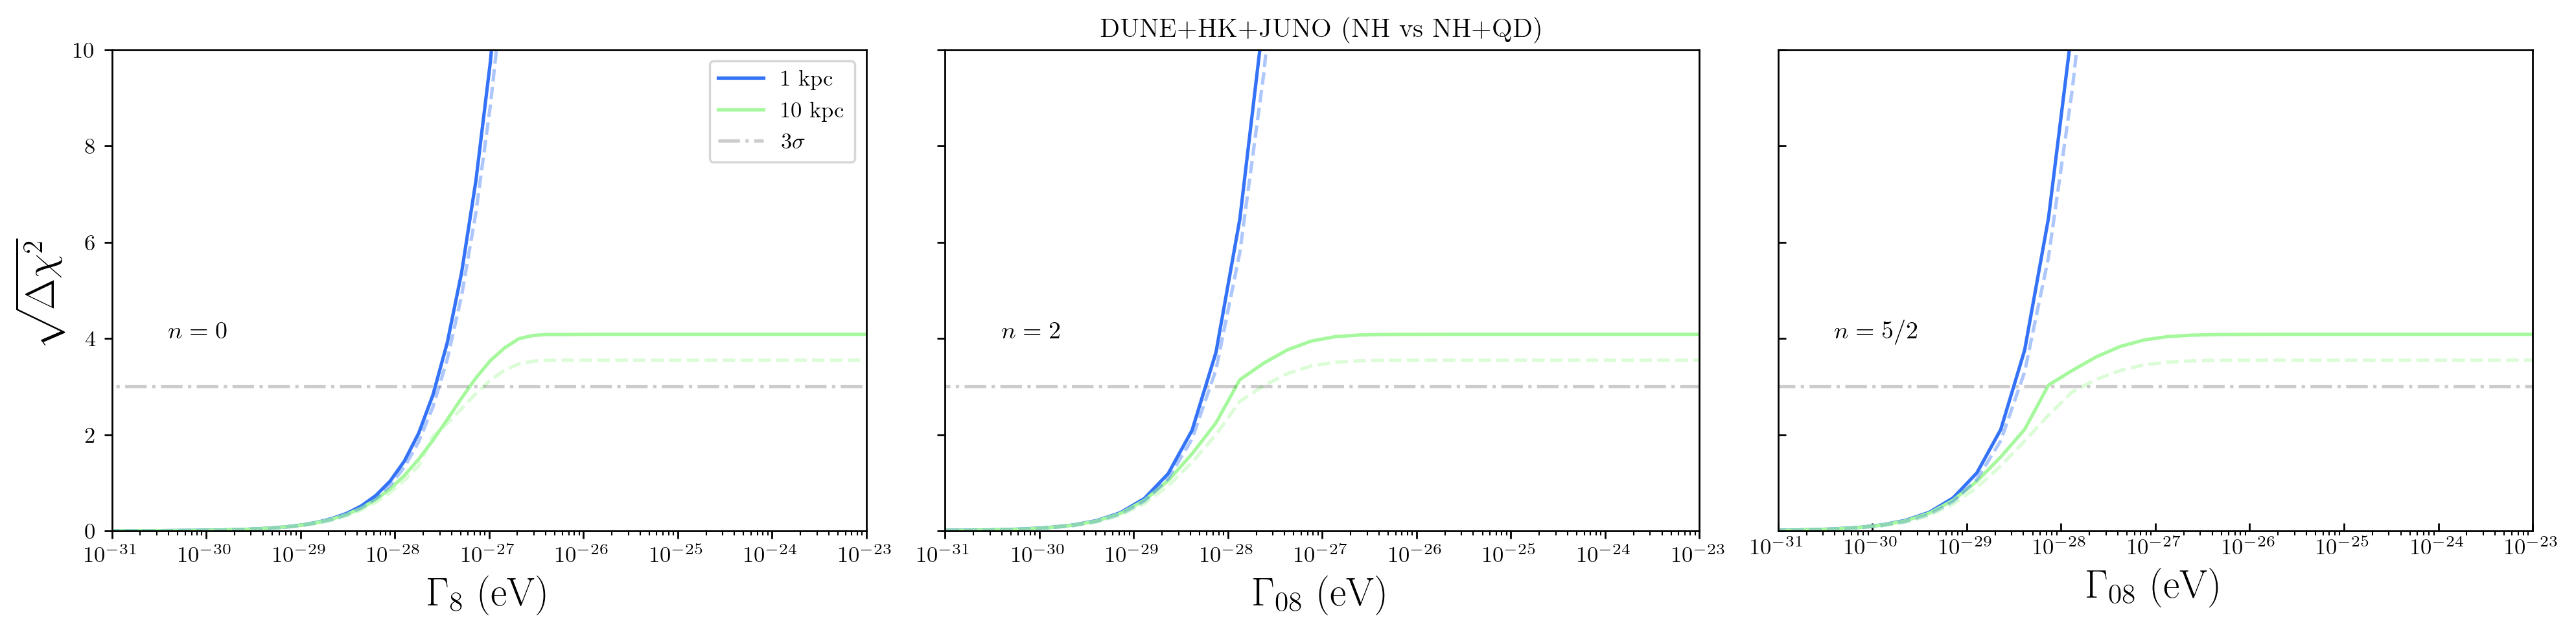

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt
from scipy.stats import chi2
from matplotlib.pyplot import cm

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ax = plt.subplots(1, 3, figsize=(16,4), dpi=250, sharey=True)
fig.subplots_adjust(wspace=0.09)
n_e_list = ['','_E','_E_2.5']
# xlim_list = [(1e-30,1e-22),(1e-50,1e-35),(1e-50,1e-35)]
# n_list = [r'$n = 0$',r'$n = 2$',r'$n = 5/2$']
# n_pos = [(4e-30,5),(1e-49,5),(1e-49,5)]
# label_list = [r'$\Gamma_8$ (eV)',r'$\Gamma_{08}$ (eV$^{-1}$)',r'$\Gamma_{08}$ (eV$^{-3/2}$)']
paleta = list(iter(cm.rainbow(np.linspace(0.15, 1, 7))))
xlim_list = [(1e-31,1e-23),(1e-31,1e-23),(1e-31,1e-23)]
n_list = [r'$n = 0$',r'$n = 2$',r'$n = 5/2$']
n_pos = [(4e-31,4),(4e-31,4),(4e-31,4)]
label_list = [r'$\Gamma_8$ (eV)',r'$\Gamma_{08}$ (eV)',r'$\Gamma_{08}$ (eV)']
n_list_value = [0,2,5/2]
E0 = 10e6

for i in range(len(ax)):
    n_e = n_e_list[i]
    # ax1,ax2,ax3 = ax[i]
    n = n_list_value[i]

    g_1, c_1,_ = np.load('results/profile_g8_exp_LS220_s27.0c_1.0kpc_dune_hk_jn_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_5, c_5,_ = np.load('results/profile_g8_exp_LS220_s27.0c_5.0kpc_dune_hk_jn_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_7, c_7,_ = np.load('results/profile_g8_exp_LS220_s27.0c_7.0kpc_dune_hk_jn_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_10, c_10,_ = np.load('results/profile_g8_exp_LS220_s27.0c_10.0kpc_dune_hk_jn_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_20, c_20,_ = np.load('results/profile_g8_exp_LS220_s27.0c_20.0kpc_dune_hk_jn_NH_vs_NH_+_OQS%s.npy'%n_e)
    min_c = min([min(c_1),min(c_5),min(c_7),min(c_10),min(c_20)])
    ax[i].plot(E0**n * 10**g_1, sqrt(c_1-min_c), '-', label=r'1 kpc', color=paleta[0])
    # ax[i].plot(E0**n * 10**g_5, sqrt(c_5-min_c), '-', label=r'5 kpc', color=paleta[1])
    # ax[i].plot(E0**n * 10**g_7, sqrt(c_7-min_c), '-', label=r'7 kpc', color=paleta[2])
    ax[i].plot(E0**n * 10**g_10, sqrt(c_10-min_c), '-', label=r'10 kpc', color=paleta[3])
    # ax[i].plot(E0**n * 10**g_20, sqrt(c_20-min_c), linestyle='-', label=r'20 kpc', color=paleta[4])


    g_1, c_1,_ = np.load('results/profile_g8_exp_LS220_s11.2c_1.0kpc_dune_hk_jn_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_5, c_5,_ = np.load('results/profile_g8_exp_LS220_s11.2c_5.0kpc_dune_hk_jn_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_7, c_7,_ = np.load('results/profile_g8_exp_LS220_s11.2c_7.0kpc_dune_hk_jn_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_10, c_10,_ = np.load('results/profile_g8_exp_LS220_s11.2c_10.0kpc_dune_hk_jn_NH_vs_NH_+_OQS%s.npy'%n_e)
    g_20, c_20,_ = np.load('results/profile_g8_exp_LS220_s11.2c_20.0kpc_dune_hk_jn_NH_vs_NH_+_OQS%s.npy'%n_e)
    min_c = min([min(c_1),min(c_5),min(c_7),min(c_10),min(c_20)])
    ax[i].plot(E0**n * 10**g_1, sqrt(c_1-min_c), '--', alpha=0.4, color=paleta[0])
    # ax[i].plot(E0**n * 10**g_5, sqrt(c_5-min_c), '--', alpha=0.4, color=paleta[1])
    # ax[i].plot(E0**n * 10**g_7, sqrt(c_7-min_c), '--', alpha=0.4, color=paleta[2])
    ax[i].plot(E0**n * 10**g_10, sqrt(c_10-min_c), '--', alpha=0.4, color=paleta[3])
    # ax[i].plot(E0**n * 10**g_20, sqrt(c_20-min_c), '--', alpha=0.4, color=paleta[4])

    ax[i].plot(E0**n * 10**g_1, np.ones(len(g_1))*np.sqrt(chi2.ppf(0.997300203936740, 1)), 'k-.', label=r'$3\sigma$', alpha=0.2)
    # ax[i].plot(E0**n * 10**g_1, np.ones(len(g_1))*np.sqrt(chi2.ppf(0.999999426696856, 1)), 'k-.', label=r'$5\sigma$', alpha=0.2)

    ax[i].set_xlim(xlim_list[i])
    ax[i].set_ylim(0,10)
    ax[i].set_xscale('log')
    ax[i].set_xlabel(label_list[i], fontsize=18)
    if i == 0:
        ax[i].legend()
        ax[i].set_ylabel('$\sqrt{\Delta\chi^2}$', fontsize=18)
    
    if i == 1:
        ax[i].set_title(r'DUNE+HK+JUNO (NH vs NH+QD)')

    ax[i].text(n_pos[i][0],n_pos[i][1], n_list[i], fontsize=11)

# fig.suptitle(r'DUNE+HK+JUNO (NH vs NH+QD)')
plt.tick_params(direction='in')
plt.tight_layout()
plt.savefig('plots/profile_mass_state_coupling_combined_1_10.pdf', dpi=250)
plt.show()

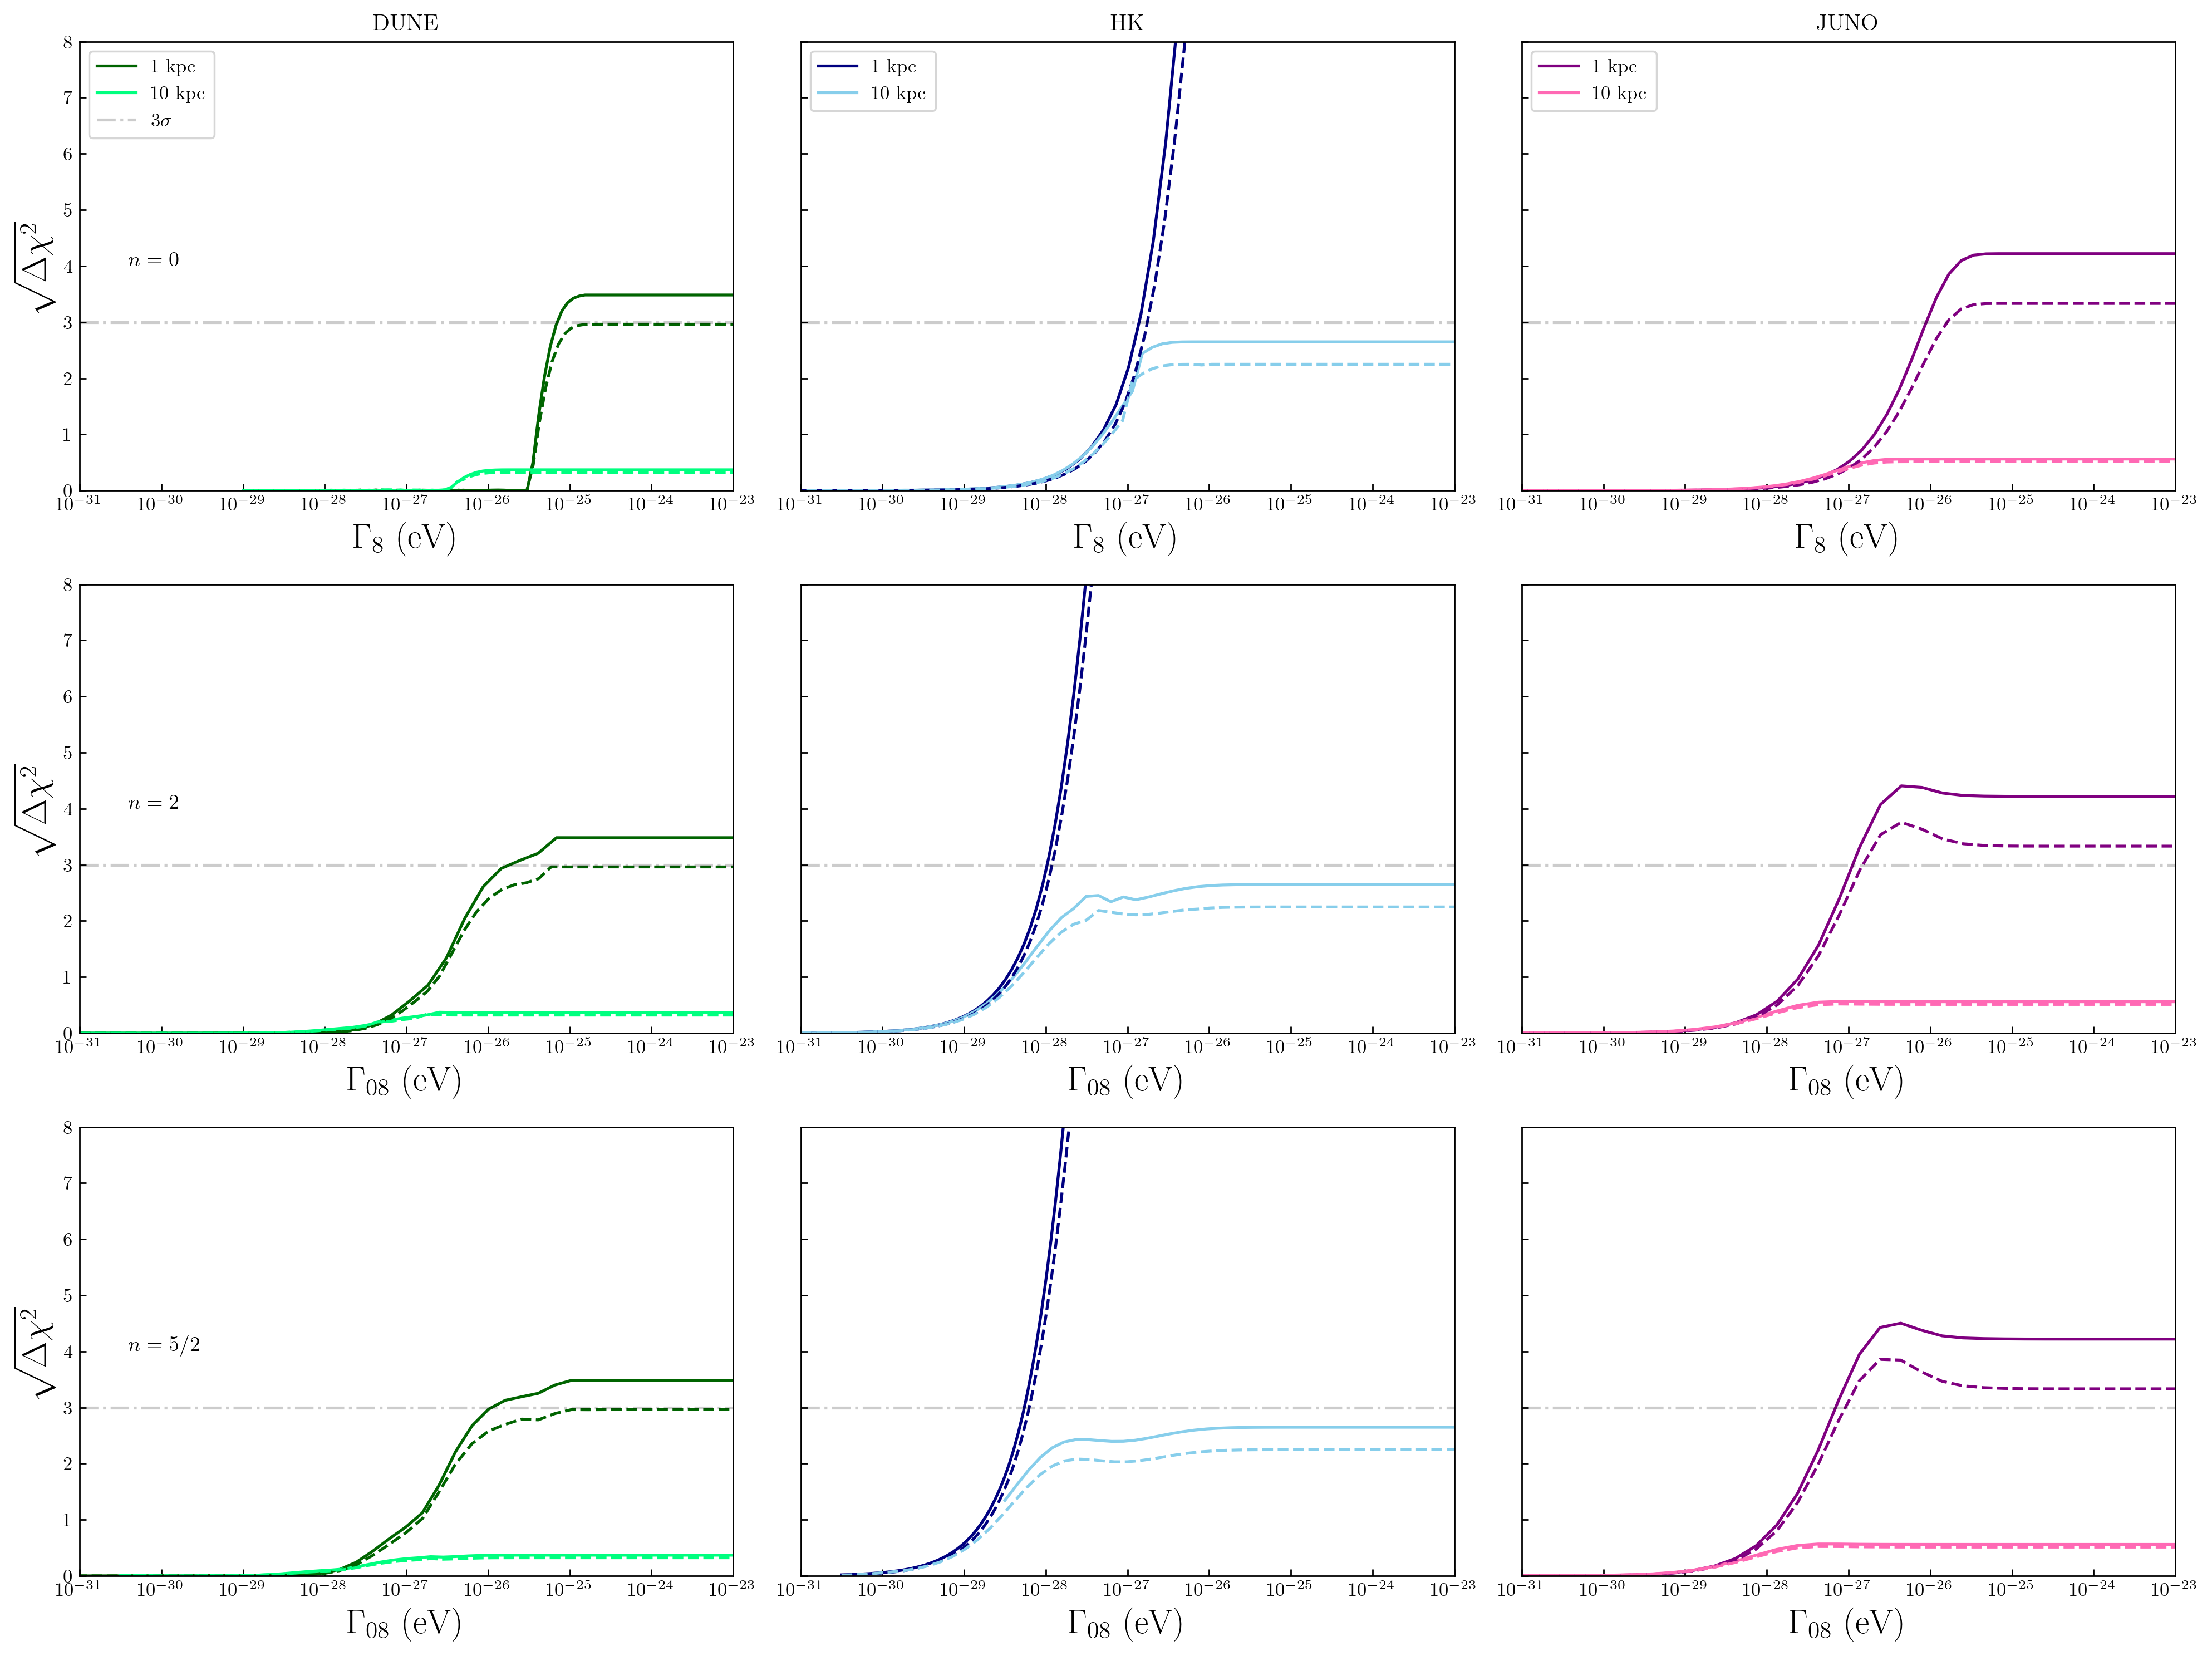

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from matplotlib import cm
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
from scipy.stats import chi2
from numpy import sqrt

theta12 = 33.45 #+0.77 -0.75 NuFIT 2021 https://arxiv.org/pdf/2111.03086.pdf
theta13 = 8.62  #+-0.12 NuFIT 2021 https://arxiv.org/pdf/2111.03086.pdf
theta23 = 49.2 #+1.0 -1.3 NuFIT 2021 https://arxiv.org/pdf/2111.03086.pdf
theta12 = theta12*pi/180
theta13 = theta13*pi/180
theta23 = theta23*pi/180
c12=np.cos(theta12)
s12=np.sin(theta12)
c13=np.cos(theta13)
s13=np.sin(theta13)
c23=np.cos(theta23)
s23=np.sin(theta23)

U23 = np.array([ [1,0,0],[0,c23,s23],[0,-s23,c23] ])
U13 = np.array([ [c13,0,s13],[0,1,0],[-s13,0,c13] ])
U12 = np.array([ [c12,s12,0],[-s12,c12,0],[0,0,1] ])
U3 = U23 @ U13 @ U12

fig, ax = plt.subplots(3, 3, figsize=(16,12), dpi=250, sharey=True)
fig.subplots_adjust(wspace=0.09)
n_e_list = ['','_E','_E_2.5']
xlim_list = [(1e-31,1e-23),(1e-31,1e-23),(1e-31,1e-23)]
# xlim_list = [(1e-30,1e-23),(1e-30,1e-23),(1e-30,1e-23)]
n_list = [r'$n = 0$',r'$n = 2$',r'$n = 5/2$']
n_pos = [(4e-31,4),(4e-31,4),(4e-31,4)]
label_list = [r'$\Gamma_8$ (eV)',r'$\Gamma_{08}$ (eV)',r'$\Gamma_{08}$ (eV)']

n_list_value = [0,2,5/2]
E0 = 10e6
vec_3sig = np.geomspace(xlim_list[0][0],xlim_list[0][1],101)

for i in range(len(ax)):
    n_e = n_e_list[i]
    ax1,ax2,ax3 = ax[i]
    n = n_list_value[i]
    paleta = ['darkgreen','mediumseagreen','limegreen','springgreen', 'aquamarine']
    g_1, c_1,_ = np.load('results/profile_g8_exp_LS220_s27.0c_1.0kpc_dune_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_5, c_5,_ = np.load('results/profile_g8_exp_LS220_s27.0c_5.0kpc_dune_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_7, c_7,_ = np.load('results/profile_g8_exp_LS220_s27.0c_7.0kpc_dune_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_10, c_10,_ = np.load('results/profile_g8_exp_LS220_s27.0c_10.0kpc_dune_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_20, c_20,_ = np.load('results/profile_g8_exp_LS220_s27.0c_20.0kpc_dune_IH_vs_IH_+_OQS%s.npy'%n_e)
   
    min_c = min([min(c_1),min(c_5),min(c_7),min(c_10),min(c_20)])
    ax1.plot(E0**n * 10**g_1, sqrt(c_1-min_c), '-', label=r'1 kpc', color=paleta[0])
    ax1.plot(E0**n * 10**g_10, sqrt(c_10-min_c), '-', label=r'10 kpc', color=paleta[3])

    g_1, c_1,_ = np.load('results/profile_g8_exp_LS220_s11.2c_1.0kpc_dune_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_5, c_5,_ = np.load('results/profile_g8_exp_LS220_s11.2c_5.0kpc_dune_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_7, c_7,_ = np.load('results/profile_g8_exp_LS220_s11.2c_7.0kpc_dune_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_10, c_10,_ = np.load('results/profile_g8_exp_LS220_s11.2c_10.0kpc_dune_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_20, c_20,_ = np.load('results/profile_g8_exp_LS220_s11.2c_20.0kpc_dune_IH_vs_IH_+_OQS%s.npy'%n_e)
    min_c = min([min(c_1),min(c_5),min(c_7),min(c_10),min(c_20)])
    ax1.plot(E0**n * 10**g_1, sqrt(c_1-min_c), '--', color=paleta[0])
    ax1.plot(E0**n * 10**g_10, sqrt(c_10-min_c), '--', color=paleta[3])

    ax1.plot(vec_3sig, np.ones(len(vec_3sig))*np.sqrt(chi2.ppf(0.997300203936740, 1)), 'k-.', label=r'$3\sigma$', alpha=0.2)
    ax1.tick_params(direction='in')
    ax1.set_xlabel(label_list[i], fontsize=18)
    ax1.set_ylabel('$\sqrt{\Delta\chi^2}$', fontsize=18)
    ax1.set_xlim(xlim_list[i])
    ax1.set_ylim(0,6)
    ax1.set_xscale('log')
    if i == 0:
        ax1.set_title(r'DUNE')
        ax1.legend(loc='upper left')
    
    ax1.text(n_pos[i][0],n_pos[i][1], n_list[i],fontsize=11)

    paleta = ['navy','royalblue','dodgerblue','skyblue', 'lightsteelblue']
    g_1, c_1,_ = np.load('results/profile_g8_exp_LS220_s27.0c_1.0kpc_hk_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_5, c_5,_ = np.load('results/profile_g8_exp_LS220_s27.0c_5.0kpc_hk_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_7, c_7,_ = np.load('results/profile_g8_exp_LS220_s27.0c_7.0kpc_hk_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_10, c_10,_ = np.load('results/profile_g8_exp_LS220_s27.0c_10.0kpc_hk_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_20, c_20,_ = np.load('results/profile_g8_exp_LS220_s27.0c_20.0kpc_hk_IH_vs_IH_+_OQS%s.npy'%n_e)
    min_c = min([min(c_1),min(c_5),min(c_7),min(c_10),min(c_20)])
    ax2.plot(E0**n * 10**g_1, sqrt(c_1-min_c), '-', label=r'1 kpc', color=paleta[0])
    ax2.plot(E0**n * 10**g_10, sqrt(c_10-min_c), '-', label=r'10 kpc', color=paleta[3])

    g_1, c_1,_ = np.load('results/profile_g8_exp_LS220_s11.2c_1.0kpc_hk_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_5, c_5,_ = np.load('results/profile_g8_exp_LS220_s11.2c_5.0kpc_hk_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_7, c_7,_ = np.load('results/profile_g8_exp_LS220_s11.2c_7.0kpc_hk_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_10, c_10,_ = np.load('results/profile_g8_exp_LS220_s11.2c_10.0kpc_hk_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_20, c_20,_ = np.load('results/profile_g8_exp_LS220_s11.2c_20.0kpc_hk_IH_vs_IH_+_OQS%s.npy'%n_e)
    min_c = min([min(c_1),min(c_5),min(c_7),min(c_10),min(c_20)])
    ax2.plot(E0**n * 10**g_1, sqrt(c_1-min_c), '--', color=paleta[0])
    ax2.plot(E0**n * 10**g_10, sqrt(c_10-min_c), '--', color=paleta[3])

    ax2.plot(vec_3sig, np.ones(len(vec_3sig))*np.sqrt(chi2.ppf(0.997300203936740, 1)), 'k-.', alpha=0.2)
    ax2.tick_params(direction='in')
    ax2.set_xlabel(label_list[i], fontsize=18)
    ax2.set_xlim(xlim_list[i])
    ax2.set_ylim(0,6)
    ax2.set_xscale('log')
    if i == 0:
        ax2.set_title(r'HK')
        ax2.legend(loc='upper left')

    paleta = ['purple','darkviolet','magenta','hotpink', 'violet']
    g_1, c_1,_ = np.load('results/profile_g8_exp_LS220_s27.0c_1.0kpc_jn_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_5, c_5,_ = np.load('results/profile_g8_exp_LS220_s27.0c_5.0kpc_jn_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_7, c_7,_ = np.load('results/profile_g8_exp_LS220_s27.0c_7.0kpc_jn_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_10, c_10,_ = np.load('results/profile_g8_exp_LS220_s27.0c_10.0kpc_jn_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_20, c_20,_ = np.load('results/profile_g8_exp_LS220_s27.0c_20.0kpc_jn_IH_vs_IH_+_OQS%s.npy'%n_e)
    
    min_c = min([min(c_1),min(c_5),min(c_7),min(c_10),min(c_20)])
    ax3.plot(E0**n * 10**g_1, sqrt(c_1-min_c), '-', label=r'1 kpc', color=paleta[0])
    ax3.plot(E0**n * 10**g_10, sqrt(c_10-min_c), '-', label=r'10 kpc', color=paleta[3])

    g_1, c_1,_ = np.load('results/profile_g8_exp_LS220_s11.2c_1.0kpc_jn_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_5, c_5,_ = np.load('results/profile_g8_exp_LS220_s11.2c_5.0kpc_jn_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_7, c_7,_ = np.load('results/profile_g8_exp_LS220_s11.2c_7.0kpc_jn_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_10, c_10,_ = np.load('results/profile_g8_exp_LS220_s11.2c_10.0kpc_jn_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_20, c_20,_ = np.load('results/profile_g8_exp_LS220_s11.2c_20.0kpc_jn_IH_vs_IH_+_OQS%s.npy'%n_e)
    
    min_c = min([min(c_1),min(c_5),min(c_7),min(c_10),min(c_20)])
    ax3.plot(E0**n * 10**g_1, sqrt(c_1-min_c), '--', color=paleta[0])
    ax3.plot(E0**n * 10**g_10, sqrt(c_10-min_c), '--', color=paleta[3])

    ax3.plot(vec_3sig, np.ones(len(vec_3sig))*np.sqrt(chi2.ppf(0.997300203936740, 1)), 'k-.', alpha=0.2)
    ax3.tick_params(direction='in')
    ax3.set_xlabel(label_list[i], fontsize=18)
    ax3.set_xlim(xlim_list[i])
    ax3.set_ylim(0,8)
    ax3.set_xscale('log')
    if i == 0:
        ax3.set_title(r'JUNO')
        ax3.legend(loc='upper left')
    
    ax1.minorticks_off()
    ax2.minorticks_off()
    ax3.minorticks_off()

plt.tight_layout()

plt.savefig('plots/profile_mass_state_coupling_all_experiments_ih_vs_ih_qd_1_10.pdf', dpi=250)
plt.show()

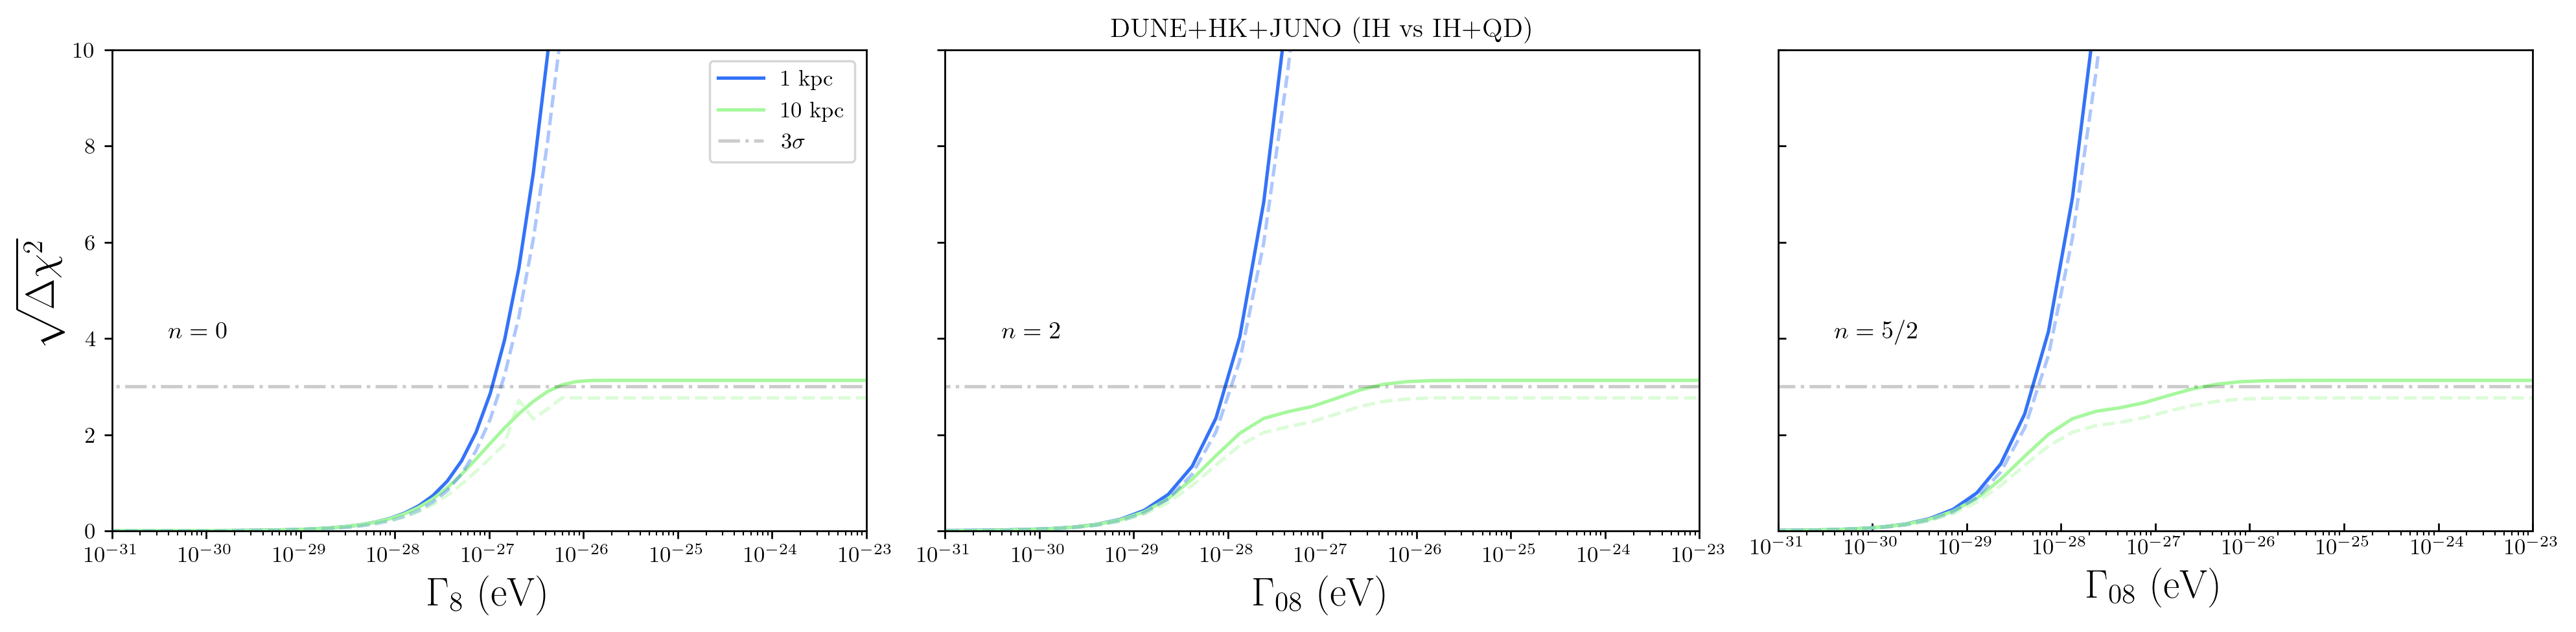

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt
from scipy.stats import chi2
from matplotlib.pyplot import cm

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ax = plt.subplots(1, 3, figsize=(16,4), dpi=250, sharey=True)
fig.subplots_adjust(wspace=0.09)
n_e_list = ['','_E','_E_2.5']
# xlim_list = [(1e-30,1e-22),(1e-50,1e-35),(1e-50,1e-35)]
# n_list = [r'$n = 0$',r'$n = 2$',r'$n = 5/2$']
# n_pos = [(4e-30,5),(1e-49,5),(1e-49,5)]
# label_list = [r'$\Gamma_8$ (eV)',r'$\Gamma_{08}$ (eV$^{-1}$)',r'$\Gamma_{08}$ (eV$^{-3/2}$)']

paleta = list(iter(cm.rainbow(np.linspace(0.15, 1, 7))))

# for i in range(len(ax)):
#     n_e = n_e_list[i]
    # ax1,ax2,ax3 = ax[i]
xlim_list = [(1e-31,1e-23),(1e-31,1e-23),(1e-31,1e-23)]
n_list = [r'$n = 0$',r'$n = 2$',r'$n = 5/2$']
n_pos = [(4e-31,4),(4e-31,4),(4e-31,4)]
label_list = [r'$\Gamma_8$ (eV)',r'$\Gamma_{08}$ (eV)',r'$\Gamma_{08}$ (eV)']
n_list_value = [0,2,5/2]
E0 = 10e6

for i in range(len(ax)):
    n_e = n_e_list[i]
    n = n_list_value[i]

    g_1, c_1,_ = np.load('results/profile_g8_exp_LS220_s27.0c_1.0kpc_dune_hk_jn_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_5, c_5,_ = np.load('results/profile_g8_exp_LS220_s27.0c_5.0kpc_dune_hk_jn_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_7, c_7,_ = np.load('results/profile_g8_exp_LS220_s27.0c_7.0kpc_dune_hk_jn_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_10, c_10,_ = np.load('results/profile_g8_exp_LS220_s27.0c_10.0kpc_dune_hk_jn_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_20, c_20,_ = np.load('results/profile_g8_exp_LS220_s27.0c_20.0kpc_dune_hk_jn_IH_vs_IH_+_OQS%s.npy'%n_e)
    min_c = min([min(c_1),min(c_5),min(c_7),min(c_10),min(c_20)])
    ax[i].plot(E0**n * 10**g_1, sqrt(c_1-min_c), '-', label=r'1 kpc', color=paleta[0])
    # ax[i].plot(E0**n * 10**g_5, sqrt(c_5-min_c), '-', label=r'5 kpc', color=paleta[1])
    # ax[i].plot(E0**n * 10**g_7, sqrt(c_7-min_c), '-', label=r'7 kpc', color=paleta[2])
    ax[i].plot(E0**n * 10**g_10, sqrt(c_10-min_c), '-', label=r'10 kpc', color=paleta[3])
    # ax[i].plot(E0**n * 10**g_20, sqrt(c_20-min_c), linestyle='-', label=r'20 kpc', color=paleta[4])

    g_1, c_1,_ = np.load('results/profile_g8_exp_LS220_s11.2c_1.0kpc_dune_hk_jn_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_5, c_5,_ = np.load('results/profile_g8_exp_LS220_s11.2c_5.0kpc_dune_hk_jn_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_7, c_7,_ = np.load('results/profile_g8_exp_LS220_s11.2c_7.0kpc_dune_hk_jn_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_10, c_10,_ = np.load('results/profile_g8_exp_LS220_s11.2c_10.0kpc_dune_hk_jn_IH_vs_IH_+_OQS%s.npy'%n_e)
    g_20, c_20,_ = np.load('results/profile_g8_exp_LS220_s11.2c_20.0kpc_dune_hk_jn_IH_vs_IH_+_OQS%s.npy'%n_e)
    min_c = min([min(c_1),min(c_5),min(c_7),min(c_10),min(c_20)])
    ax[i].plot(E0**n * 10**g_1, sqrt(c_1-min_c), '--', alpha=0.4, color=paleta[0])
    # ax[i].plot(E0**n * 10**g_5, sqrt(c_5-min_c), '--', alpha=0.4, color=paleta[1])
    # ax[i].plot(E0**n * 10**g_7, sqrt(c_7-min_c), '--', alpha=0.4, color=paleta[2])
    ax[i].plot(E0**n * 10**g_10, sqrt(c_10-min_c), '--', alpha=0.4, color=paleta[3])
    # ax[i].plot(E0**n * 10**g_20, sqrt(c_20-min_c), '--', alpha=0.4, color=paleta[4])

    ax[i].plot(E0**n * 10**g_1, np.ones(len(g_1))*np.sqrt(chi2.ppf(0.997300203936740, 1)), 'k-.', label=r'$3\sigma$', alpha=0.2)
    # ax[i].plot(E0**n * 10**g_1, np.ones(len(g_1))*np.sqrt(chi2.ppf(0.999999426696856, 1)), 'k-.', label=r'$5\sigma$', alpha=0.2)

    ax[i].set_xlim(xlim_list[i])
    ax[i].set_ylim(0,10)
    ax[i].set_xscale('log')
    ax[i].set_xlabel(label_list[i], fontsize=18)
    if i == 0:
        ax[i].legend()
        ax[i].set_ylabel('$\sqrt{\Delta\chi^2}$', fontsize=18)
    
    if i == 1:
        ax[i].set_title(r'DUNE+HK+JUNO (IH vs IH+QD)')

    ax[i].text(n_pos[i][0],n_pos[i][1], n_list[i], fontsize=11)
    # ax[i].minor_ticks_on()

# fig.suptitle(r'DUNE+HK+JUNO (IH vs IH+QD)')
plt.tick_params(direction='in')
plt.tight_layout()
plt.savefig('plots/profile_mass_state_coupling_combined_ih_vs_ih_qd_1_10.pdf', dpi=250)
plt.show()

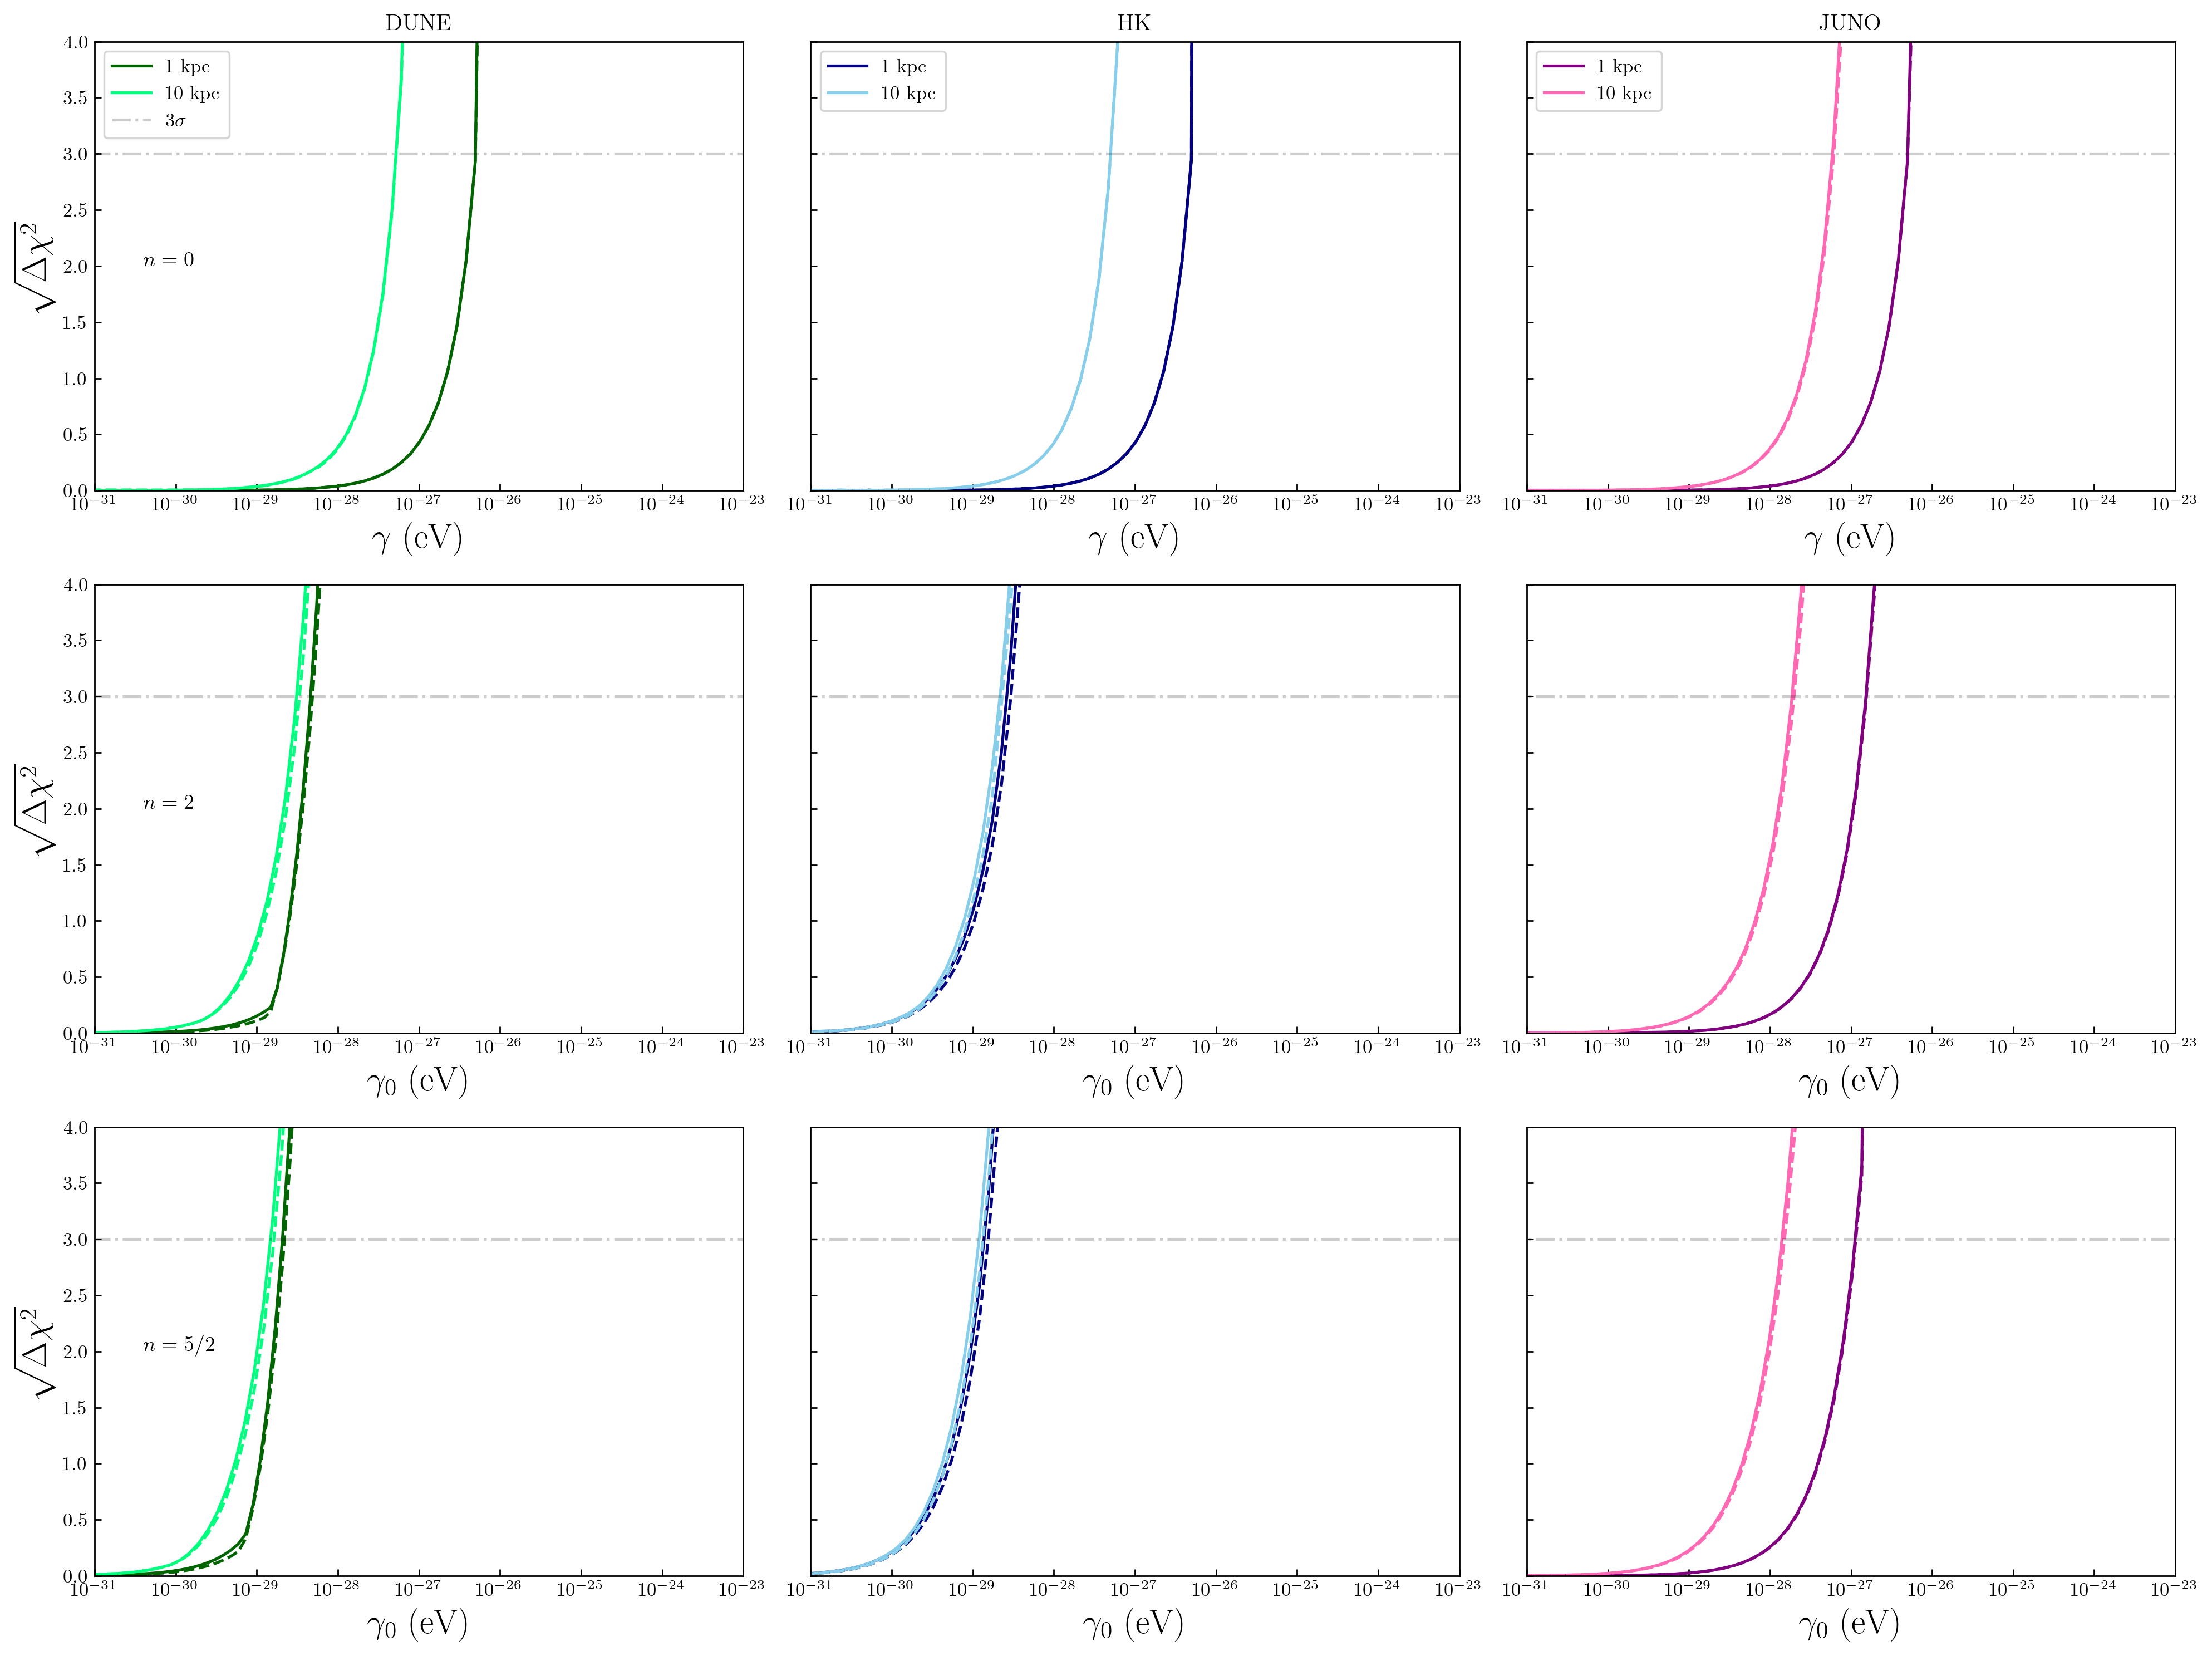

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from matplotlib import cm
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
from scipy.stats import chi2
from numpy import sqrt

theta12 = 33.45 #+0.77 -0.75 NuFIT 2021 https://arxiv.org/pdf/2111.03086.pdf
theta13 = 8.62  #+-0.12 NuFIT 2021 https://arxiv.org/pdf/2111.03086.pdf
theta23 = 49.2 #+1.0 -1.3 NuFIT 2021 https://arxiv.org/pdf/2111.03086.pdf
theta12 = theta12*pi/180
theta13 = theta13*pi/180
theta23 = theta23*pi/180
c12=np.cos(theta12)
s12=np.sin(theta12)
c13=np.cos(theta13)
s13=np.sin(theta13)
c23=np.cos(theta23)
s23=np.sin(theta23)

U23 = np.array([ [1,0,0],[0,c23,s23],[0,-s23,c23] ])
U13 = np.array([ [c13,0,s13],[0,1,0],[-s13,0,c13] ])
U12 = np.array([ [c12,s12,0],[-s12,c12,0],[0,0,1] ])
U3 = U23 @ U13 @ U12

fig, ax = plt.subplots(3, 3, figsize=(16,12), dpi=250, sharey=True)
fig.subplots_adjust(wspace=0.09)
n_e_list = ['','_E','_E_2.5']
# xlim_list = [(1e-37,1e-22),(1e-50,1e-36),(1e-55,1e-36)]
# xlim_list = [(1e-30,1e-24),(1e-45,1e-40),(1e-50,1e-42)]
# # xlim_list = [(1e-50,1e-22),(1e-50,1e-22),(1e-50,1e-22)]
# n_list = [r'$n = 0$',r'$n = 2$',r'$n = 5/2$']
# n_pos = [(2e-30,2),(2e-45,2),(3.5e-50,2)]
# label_list = [r'$\gamma$ (eV)',r'$\gamma_{0}$ (eV$^{-1}$)',r'$\gamma_{0}$ (eV$^{-3/2}$)']

xlim_list = [(1e-31,1e-23),(1e-31,1e-23),(1e-31,1e-23)]
n_list = [r'$n = 0$',r'$n = 2$',r'$n = 5/2$']
n_pos = [(4e-31,2),(4e-31,2),(4e-31,2)]
label_list = [r'$\gamma$ (eV)',r'$\gamma_{0}$ (eV)',r'$\gamma_{0}$ (eV)']
n_list_value = [0,2,5/2]
E0 = 10e6

for i in range(len(ax)):
    n_e = n_e_list[i]
    ax1,ax2,ax3 = ax[i]
    n = n_list_value[i]
# for i in range(len(ax)):
#     n_e = n_e_list[i]
#     ax1,ax2,ax3 = ax[i]

    paleta = ['darkgreen','mediumseagreen','limegreen','springgreen', 'aquamarine']
    g_1, c_1,_ = np.load('results/profile_g_exp_LS220_s27.0c_1.0kpc_dune_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    g_5, c_5,_ = np.load('results/profile_g_exp_LS220_s27.0c_5.0kpc_dune_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    g_7, c_7,_ = np.load('results/profile_g_exp_LS220_s27.0c_7.0kpc_dune_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    g_10, c_10,_ = np.load('results/profile_g_exp_LS220_s27.0c_10.0kpc_dune_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    min_c = min([min(c_1),min(c_5),min(c_7),min(c_10)])
    ax1.plot(E0**n * 10**g_1, sqrt(c_1-min_c), '-', label=r'1 kpc', color=paleta[0])
    # ax1.plot(E0**n * 10**g_5, sqrt(c_5-min_c), '-', label=r'5 kpc', color=paleta[1])
    # ax1.plot(E0**n * 10**g_7, sqrt(c_7-min_c), '-', label=r'7 kpc', color=paleta[2])
    ax1.plot(E0**n * 10**g_10, sqrt(c_10-min_c), '-', label=r'10 kpc', color=paleta[3])

    g_1, c_1,_ = np.load('results/profile_g_exp_LS220_s11.2c_1.0kpc_dune_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    g_5, c_5,_ = np.load('results/profile_g_exp_LS220_s11.2c_5.0kpc_dune_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    g_7, c_7,_ = np.load('results/profile_g_exp_LS220_s11.2c_7.0kpc_dune_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    g_10, c_10,_ = np.load('results/profile_g_exp_LS220_s11.2c_10.0kpc_dune_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    g_50, c_50,_ = np.load('results/profile_g_exp_LS220_s11.2c_20.0kpc_dune_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    min_c = min([min(c_1),min(c_5),min(c_7),min(c_10)])
    ax1.plot(E0**n * 10**g_1, sqrt(c_1-min_c), '--', color=paleta[0])
    # ax1.plot(E0**n * 10**g_5, sqrt(c_5-min_c), '--', color=paleta[1])
    # ax1.plot(E0**n * 10**g_7, sqrt(c_7-min_c), '--', color=paleta[2])
    ax1.plot(E0**n * 10**g_10, sqrt(c_10-min_c), '--', color=paleta[3])

    ax1.plot(np.geomspace(1e-55,1e-10,201), np.ones(201)*np.sqrt(chi2.ppf(0.997300203936740, 1)), 'k-.', label=r'$3\sigma$', alpha=0.2)
    ax1.tick_params(direction='in')
    ax1.set_xlabel(label_list[i], fontsize=18)
    ax1.set_ylabel('$\sqrt{\Delta\chi^2}$', fontsize=18)
    ax1.set_xlim(xlim_list[i])
    ax1.set_ylim(0,4)
    ax1.set_xscale('log')
    if i == 0:
        ax1.set_title(r'DUNE')
        ax1.legend(loc='upper left')
    
    ax1.text(n_pos[i][0],n_pos[i][1], n_list[i],fontsize=11)

    paleta = ['navy','royalblue','dodgerblue','skyblue', 'lightsteelblue']
    g_1, c_1,_ = np.load('results/profile_g_exp_LS220_s27.0c_1.0kpc_hk_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    g_5, c_5,_ = np.load('results/profile_g_exp_LS220_s27.0c_5.0kpc_hk_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    g_7, c_7,_ = np.load('results/profile_g_exp_LS220_s27.0c_7.0kpc_hk_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    g_10, c_10,_ = np.load('results/profile_g_exp_LS220_s27.0c_10.0kpc_hk_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    min_c = min([min(c_1),min(c_5),min(c_7),min(c_10)])
    ax2.plot(E0**n * 10**g_1, sqrt(c_1-min_c), '-', label=r'1 kpc', color=paleta[0])
    # ax2.plot(E0**n * 10**g_5, sqrt(c_5-min_c), '-', label=r'5 kpc', color=paleta[1])
    # ax2.plot(E0**n * 10**g_7, sqrt(c_7-min_c), '-', label=r'7 kpc', color=paleta[2])
    ax2.plot(E0**n * 10**g_10, sqrt(c_10-min_c), '-', label=r'10 kpc', color=paleta[3])
    # ax2.plot(E0**n * 10**g_50, sqrt(c_50-min(c_50)), '-', label=r'50 kpc', color=paleta[4])

    g_1, c_1,_ = np.load('results/profile_g_exp_LS220_s11.2c_1.0kpc_hk_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    g_5, c_5,_ = np.load('results/profile_g_exp_LS220_s11.2c_5.0kpc_hk_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    g_7, c_7,_ = np.load('results/profile_g_exp_LS220_s11.2c_7.0kpc_hk_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    g_10, c_10,_ = np.load('results/profile_g_exp_LS220_s11.2c_10.0kpc_hk_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    g_50, c_50,_ = np.load('results/profile_g_exp_LS220_s11.2c_20.0kpc_hk_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    min_c = min([min(c_1),min(c_5),min(c_7),min(c_10)])
    ax2.plot(E0**n * 10**g_1, sqrt(c_1-min_c), '--', color=paleta[0])
    # ax2.plot(E0**n * 10**g_5, sqrt(c_5-min_c), '--', color=paleta[1])
    # ax2.plot(E0**n * 10**g_7, sqrt(c_7-min_c), '--', color=paleta[2])
    ax2.plot(E0**n * 10**g_10, sqrt(c_10-min_c), '--', color=paleta[3])

    ax2.plot(np.geomspace(1e-55,1e-10,201), np.ones(201)*np.sqrt(chi2.ppf(0.997300203936740, 1)), 'k-.', alpha=0.2)
    ax2.tick_params(direction='in')
    ax2.set_xlabel(label_list[i], fontsize=18)
    ax2.set_xlim(xlim_list[i])
    ax2.set_ylim(0,4)
    ax2.set_xscale('log')
    if i == 0:
        ax2.set_title(r'HK')
        ax2.legend(loc='upper left')

    paleta = ['purple','darkviolet','magenta','hotpink', 'violet']
    g_1, c_1,_ = np.load('results/profile_g_exp_LS220_s27.0c_1.0kpc_jn_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    g_5, c_5,_ = np.load('results/profile_g_exp_LS220_s27.0c_5.0kpc_jn_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    g_7, c_7,_ = np.load('results/profile_g_exp_LS220_s27.0c_7.0kpc_jn_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    g_10, c_10,_ = np.load('results/profile_g_exp_LS220_s27.0c_10.0kpc_jn_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    min_c = min([min(c_1),min(c_5),min(c_7),min(c_10)])
    ax3.plot(E0**n * 10**g_1, sqrt(c_1-min_c), '-', label=r'1 kpc', color=paleta[0])
    # ax3.plot(E0**n * 10**g_5, sqrt(c_5-min_c), '-', label=r'5 kpc', color=paleta[1])
    # ax3.plot(E0**n * 10**g_7, sqrt(c_7-min_c), '-', label=r'7 kpc', color=paleta[2])
    ax3.plot(E0**n * 10**g_10, sqrt(c_10-min_c), '-', label=r'10 kpc', color=paleta[3])

    g_1, c_1,_ = np.load('results/profile_g_exp_LS220_s11.2c_1.0kpc_jn_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    g_5, c_5,_ = np.load('results/profile_g_exp_LS220_s11.2c_5.0kpc_jn_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    g_7, c_7,_ = np.load('results/profile_g_exp_LS220_s11.2c_7.0kpc_jn_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    g_10, c_10,_ = np.load('results/profile_g_exp_LS220_s11.2c_10.0kpc_jn_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    g_50, c_50,_ = np.load('results/profile_g_exp_LS220_s11.2c_20.0kpc_jn_IH_vs_IH_+_OQS_loss%s.npy'%n_e)
    min_c = min([min(c_1),min(c_5),min(c_7),min(c_10)])
    ax3.plot(E0**n * 10**g_1, sqrt(c_1-min_c), '--', color=paleta[0])
    # ax3.plot(E0**n * 10**g_5, sqrt(c_5-min_c), '--', color=paleta[1])
    # ax3.plot(E0**n * 10**g_7, sqrt(c_7-min_c), '--', color=paleta[2])
    ax3.plot(E0**n * 10**g_10, sqrt(c_10-min_c), '--', color=paleta[3])

    ax3.plot(np.geomspace(1e-55,1e-10,201), np.ones(201)*np.sqrt(chi2.ppf(0.997300203936740, 1)), 'k-.', alpha=0.2)
    ax3.tick_params(direction='in')
    ax3.set_xlabel(label_list[i], fontsize=18)
    ax3.set_xlim(xlim_list[i])
    ax3.set_ylim(0,4)
    ax3.set_xscale('log')
    if i == 0:
        ax3.set_title(r'JUNO')
        ax3.legend(loc='upper left')
    ax1.minorticks_off()
    ax2.minorticks_off()
    ax3.minorticks_off()

plt.tight_layout()
plt.savefig('plots/profile_nu_loss_all_experiments_1_10.pdf',dpi=250)
plt.show()

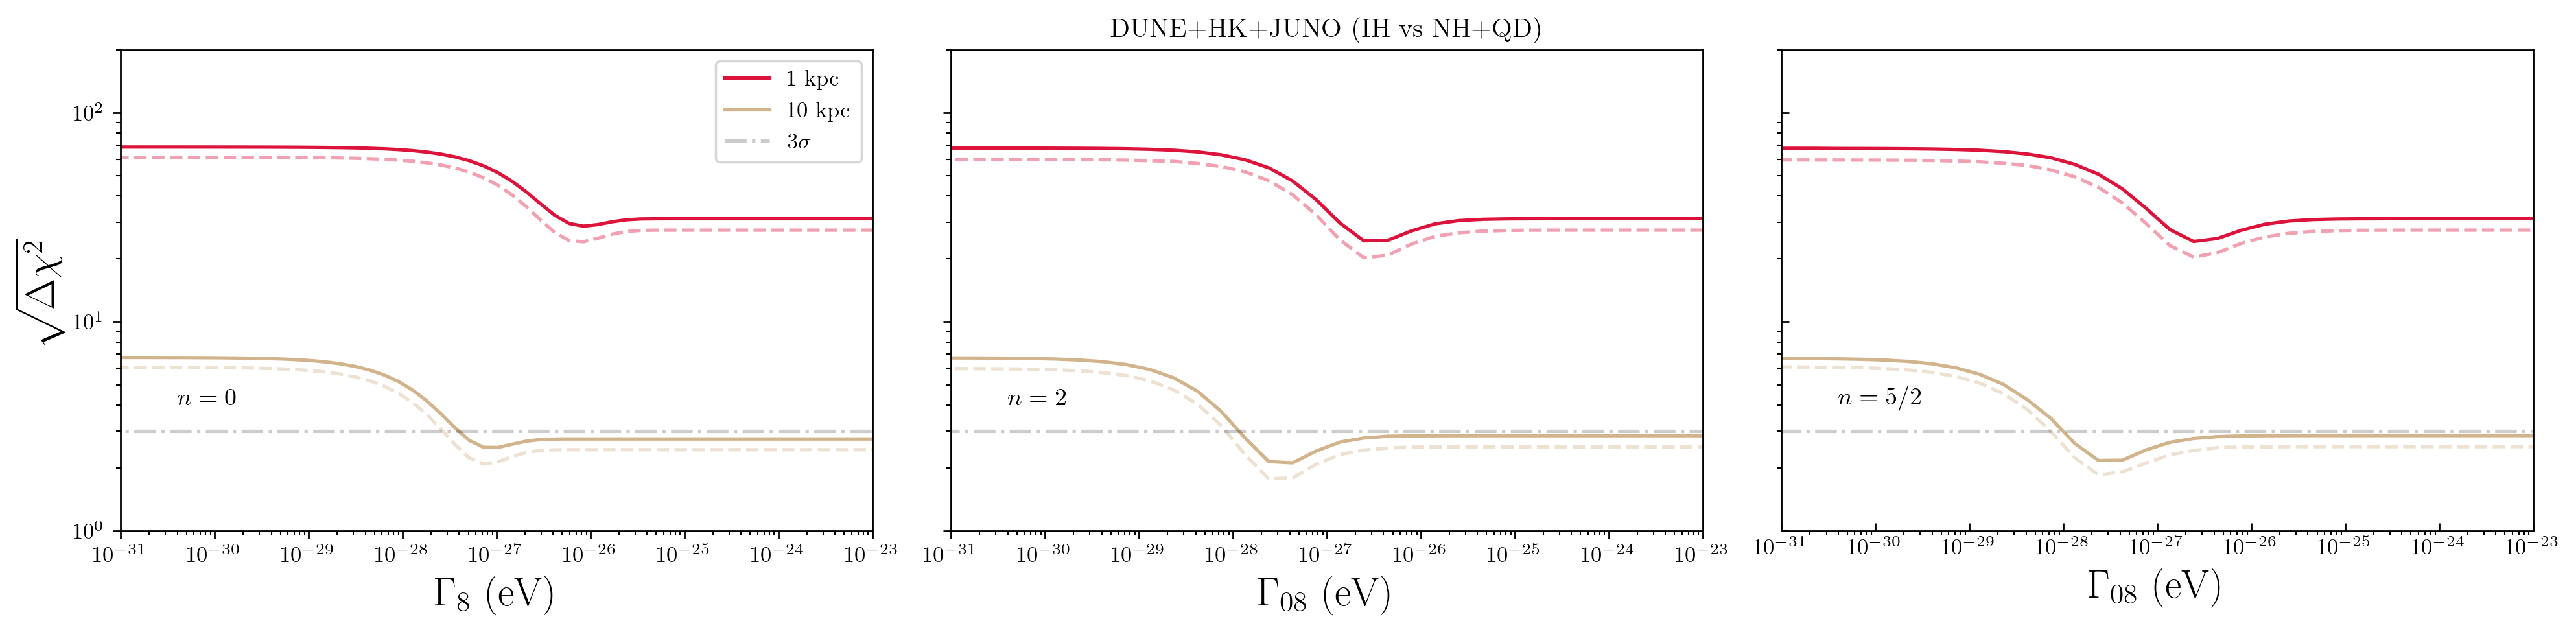

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt
from scipy.stats import chi2
from matplotlib.pyplot import cm
from scipy.interpolate import interp1d

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ax = plt.subplots(1, 3, figsize=(16,4), dpi=250, sharey=True)
fig.subplots_adjust(wspace=0.09)
n_e_list = ['','_E','_E_2.5']
# xlim_list = [(1e-30,1e-24),(1e-45,1e-38),(1e-50,1e-40)]
# n_list = [r'$n = 0$',r'$n = 2$',r'$n = 5/2$']
# n_pos = [(4e-30,15),(4e-45,15),(1e-49,15)]
# label_list = [r'$\Gamma_8$ (eV)',r'$\Gamma_{08}$ (eV$^{-1}$)',r'$\Gamma_{08}$ (eV$^{-3/2}$)']

paleta = ['crimson','orangered','darkorange','tan', 'khaki']

xlim_list = [(1e-31,1e-23),(1e-31,1e-23),(1e-31,1e-23)]
n_list = [r'$n = 0$',r'$n = 2$',r'$n = 5/2$']
n_pos = [(4e-31,4),(4e-31,4),(4e-31,4)]
label_list = [r'$\Gamma_8$ (eV)',r'$\Gamma_{08}$ (eV)',r'$\Gamma_{08}$ (eV)']
n_list_value = [0,2,5/2]
E0 = 10e6

for i in range(len(ax)):
    n_e = n_e_list[i]
    # ax1,ax2,ax3 = ax[i]
    n = n_list_value[i]

    g_1, c_1,_ = np.load('results/profile_g8_exp_LS220_s27.0c_1.0kpc_dune_hk_jn_iH_vs_NH_+_OQS%s.npy'%n_e)
    g_5, c_5,_ = np.load('results/profile_g8_exp_LS220_s27.0c_5.0kpc_dune_hk_jn_iH_vs_NH_+_OQS%s.npy'%n_e)
    g_7, c_7,_ = np.load('results/profile_g8_exp_LS220_s27.0c_7.0kpc_dune_hk_jn_iH_vs_NH_+_OQS%s.npy'%n_e)
    g_10, c_10,_ = np.load('results/profile_g8_exp_LS220_s27.0c_10.0kpc_dune_hk_jn_iH_vs_NH_+_OQS%s.npy'%n_e)
    g_20, c_20,_ = np.load('results/profile_g8_exp_LS220_s27.0c_20.0kpc_dune_hk_jn_IH_vs_NH_+_OQS%s.npy'%n_e)
    # g_50, c_50,_ = np.load('results/profile_g8_exp_LS220_s27.0c_50.0kpc_dune_hk_jn_IH_vs_NH_+_OQS%s.npy'%n_e)
    
    # print(min(c_1),min(c_5),min(c_7),min(c_10),min(c_20))
    # ax[i].plot(E0**n * 10**g_1, sqrt(c_1-min(c_1)), '-', label=r'1 kpc', color=paleta[0])
    # ax[i].plot(E0**n * 10**g_5, sqrt(c_5-min(c_5)), '-', label=r'5 kpc', color=paleta[1])
    # ax[i].plot(E0**n * 10**g_7, sqrt(c_7-min(c_7)), '-', label=r'7 kpc', color=paleta[2])
    # ax[i].plot(E0**n * 10**g_10, sqrt(c_10-min(c_10)), '-', label=r'10 kpc', color=paleta[3])
    # ax[i].plot(E0**n * 10**g_20, sqrt(c_20-min(c_20)), '-', label=r'20 kpc', color=paleta[4])

    min_c = min([min(c_1),min(c_5),min(c_7),min(c_10),min(c_20)])
    ax[i].plot(E0**n * 10**g_1, sqrt(c_1-min_c), '-', label=r'1 kpc', color=paleta[0])
    # ax[i].plot(E0**n * 10**g_5, sqrt(c_5-min_c), '-', label=r'5 kpc', color=paleta[1])
    # ax[i].plot(E0**n * 10**g_7, sqrt(c_7-min_c), '-', label=r'7 kpc', color=paleta[2])
    ax[i].plot(E0**n * 10**g_10, sqrt(c_10-min_c), '-', label=r'10 kpc', color=paleta[3])
    # ax[i].plot(E0**n * 10**g_20, sqrt(c_20-min_c), '-', label=r'20 kpc', color=paleta[4])
    # ax[i].plot(E0**n * 10**g_50, sqrt(c_50-min_c), '-', label=r'50 kpc', color=paleta[4])

    # if i == 0:
    #     chi_func = interp1d(g_10, c_10,kind='cubic')
    #     ax[i].plot(1e-24, sqrt(chi_func(-24)),'ko')

    g_1, c_1,_ = np.load('results/profile_g8_exp_LS220_s11.2c_1.0kpc_dune_hk_jn_iH_vs_NH_+_OQS%s.npy'%n_e)
    g_5, c_5,_ = np.load('results/profile_g8_exp_LS220_s11.2c_5.0kpc_dune_hk_jn_iH_vs_NH_+_OQS%s.npy'%n_e)
    g_7, c_7,_ = np.load('results/profile_g8_exp_LS220_s11.2c_7.0kpc_dune_hk_jn_iH_vs_NH_+_OQS%s.npy'%n_e)
    g_10, c_10,_ = np.load('results/profile_g8_exp_LS220_s11.2c_10.0kpc_dune_hk_jn_iH_vs_NH_+_OQS%s.npy'%n_e)
    g_20, c_20,_ = np.load('results/profile_g8_exp_LS220_s11.2c_20.0kpc_dune_hk_jn_IH_vs_NH_+_OQS%s.npy'%n_e)
    # g_50, c_50,_ = np.load('results/profile_g8_exp_LS220_s11.2c_50.0kpc_dune_hk_jn_IH_vs_NH_+_OQS%s.npy'%n_e)

    # ax[i].plot(E0**n * 10**g_1, sqrt(c_1-min(c_1)), '--', alpha=0.4, color=paleta[0])
    # ax[i].plot(E0**n * 10**g_5, sqrt(c_5-min(c_5)), '--', alpha=0.4, color=paleta[1])
    # ax[i].plot(E0**n * 10**g_7, sqrt(c_7-min(c_7)), '--', alpha=0.4, color=paleta[2])
    # ax[i].plot(E0**n * 10**g_10, sqrt(c_10-min(c_10)), '--', alpha=0.4, color=paleta[3])
    # ax[i].plot(E0**n * 10**g_20, sqrt(c_20-min(c_20)), '--', alpha=0.4, color=paleta[4])

    min_c = min([min(c_1),min(c_5),min(c_7),min(c_10),min(c_20)])
    # print(min(c_1),min(c_5),min(c_7),min(c_10),min(c_20))
    # print(min_c)
    # print()
    ax[i].plot(E0**n * 10**g_1, sqrt(c_1-min_c), '--', alpha=0.4, color=paleta[0])
    # ax[i].plot(E0**n * 10**g_5, sqrt(c_5-min_c), '--', alpha=0.4, color=paleta[1])
    # ax[i].plot(E0**n * 10**g_7, sqrt(c_7-min_c), '--', alpha=0.4, color=paleta[2])
    ax[i].plot(E0**n * 10**g_10, sqrt(c_10-min_c), '--', alpha=0.4, color=paleta[3])
    # ax[i].plot(E0**n * 10**g_20, sqrt(c_20-min_c), '--', alpha=0.4, color=paleta[4])
    # ax[i].plot(E0**n * 10**g_50, sqrt(c_50-min_c), '-', label=r'50 kpc', color=paleta[4])

    ax[i].plot(E0**n * 10**g_1, np.ones(len(g_1))*np.sqrt(chi2.ppf(0.997300203936740, 1)), 'k-.', label=r'$3\sigma$', alpha=0.2)
    # ax[i].plot(E0**n * 10**g_1, np.ones(len(g_1))*np.sqrt(chi2.ppf(0.999999426696856, 1)), 'k-.', label=r'$5\sigma$', alpha=0.2)

    ax[i].set_xlim(xlim_list[i])
    # ax[i].set_ylim(.3,100)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xlabel(label_list[i], fontsize=18)
    if i == 0:
        ax[i].legend(loc='upper right')
        ax[i].set_ylabel('$\sqrt{\Delta\chi^2}$', fontsize=18)
    
    if i == 1:
        ax[i].set_title(r'DUNE+HK+JUNO (IH vs NH+QD)')

    ax[i].text(n_pos[i][0],n_pos[i][1], n_list[i], fontsize=11)
    ax[i].set_ylim(1,200)

# fig.suptitle(r'DUNE+HK+JUNO (NH vs NH+QD)')
plt.tick_params(direction='in')
plt.tight_layout()
plt.savefig('plots/profile_mass_state_coupling_combined_ih_vs_nh_qd_1_10.pdf', dpi=250)
plt.show()

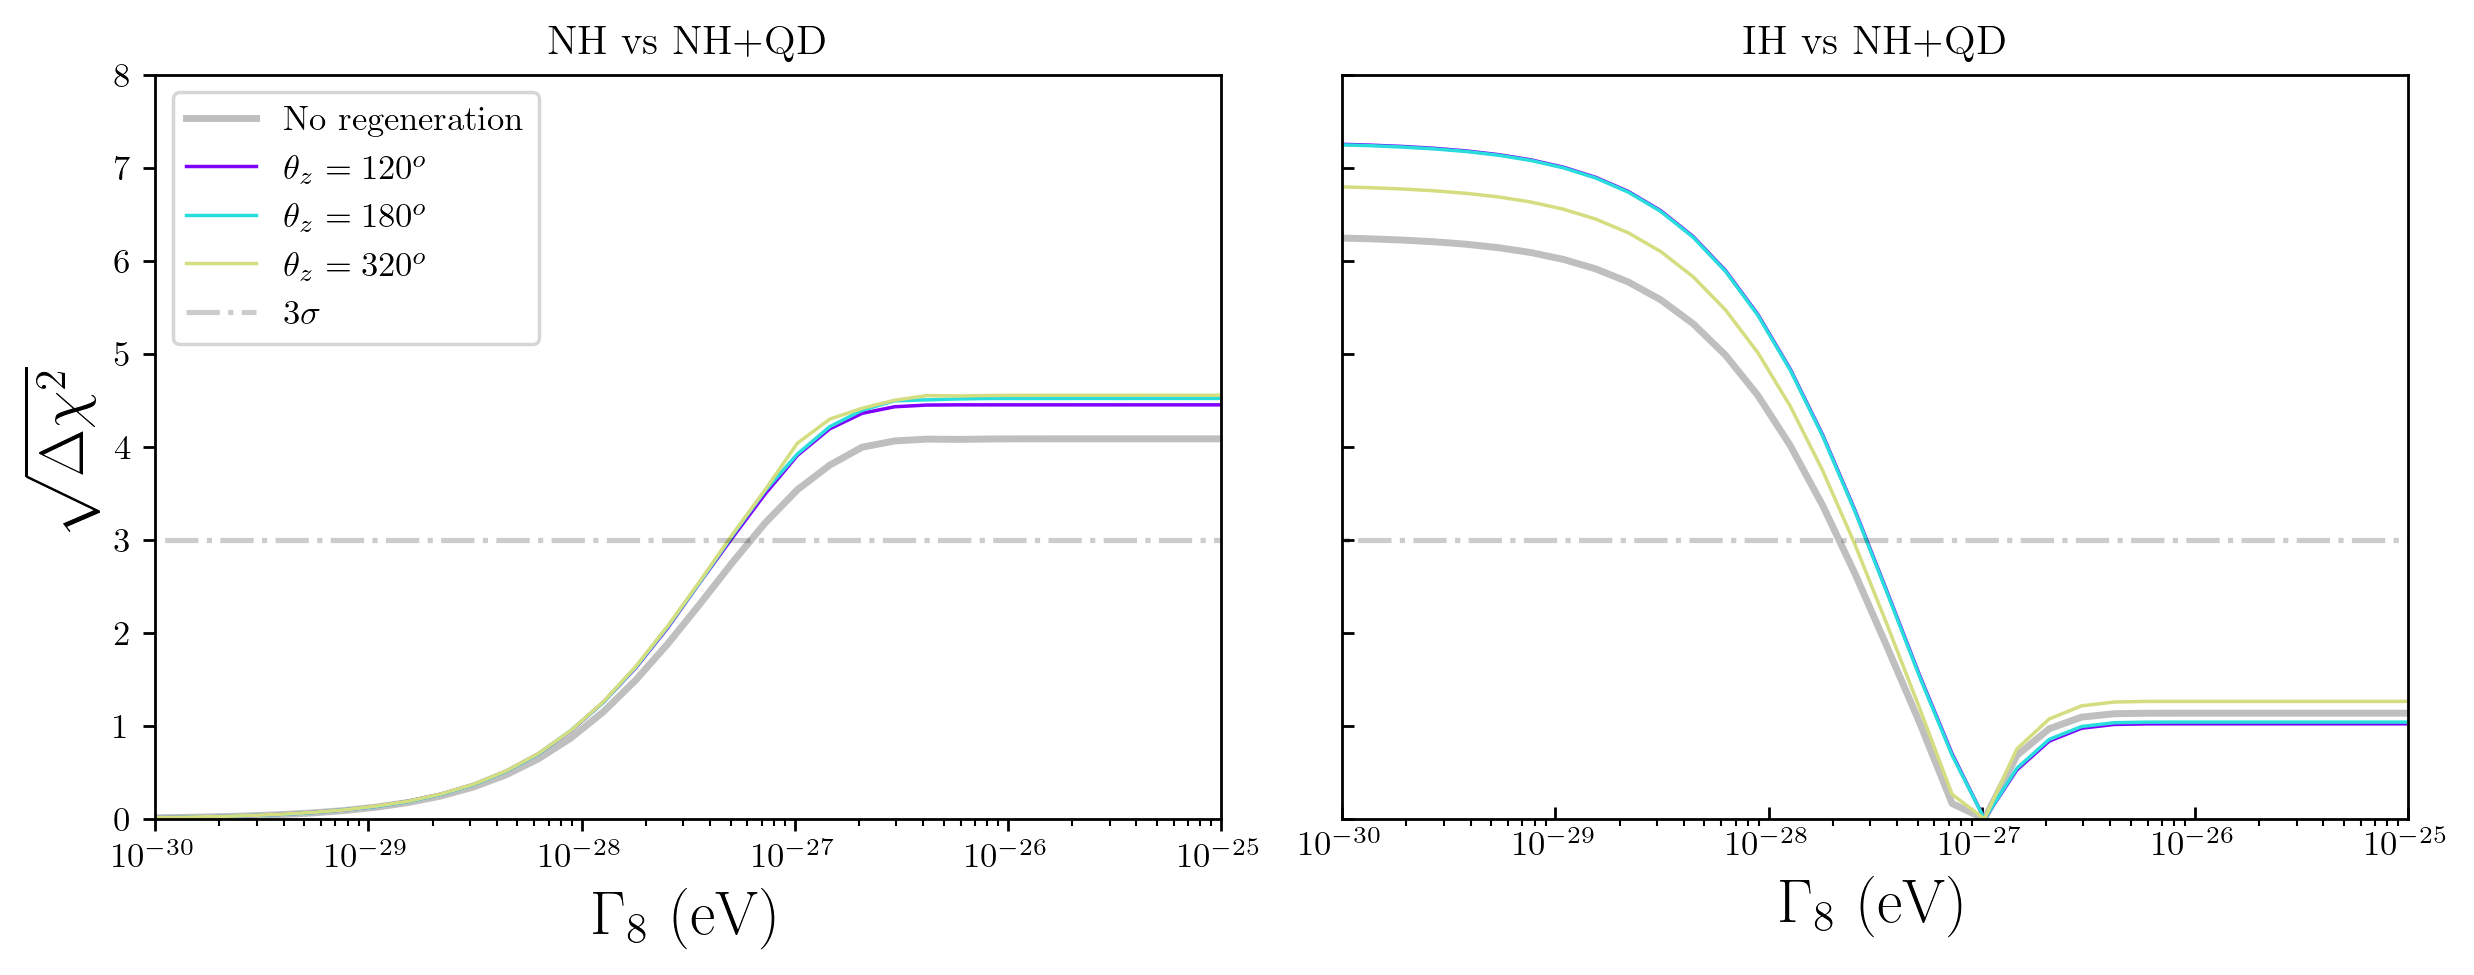

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm
from numpy import sqrt
from scipy.stats import chi2
import sqlite3

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# plt.figure(dpi=250)
fig, ax = plt.subplots(1, 2, figsize=(10,4), dpi=250, sharey=True)
fig.subplots_adjust(wspace=0.09)
z_list = [120,180,320]

g_10, c_10, _ = np.load('results/profile_g8_exp_LS220_s27.0c_10.0kpc_dune_hk_jn_NH_vs_NH_+_OQS.npy')
ax[0].plot(10**g_10, sqrt(c_10-min(c_10)), '-', lw=2, alpha=0.5, label='No regeneration', color='gray')

g_10, c_10, _ = np.load('results/profile_g8_exp_LS220_s27.0c_10.0kpc_dune_hk_jn_IH_vs_NH_+_OQS.npy')
ax[1].plot(10**g_10, sqrt(c_10-min(c_10)), '-', lw=2, alpha=0.5, label='No regeneration', color='gray')

s = ['NH','IH']

for i in range(len(ax)):
    g_120, c_120, _ = np.load('results/profile_g8_exp_LS220_s27.0c_10kpc_dune_hk_jn_%s(m)_vs_NH(m)_+_OQS_zenith_120.npy'%s[i])
    g_180, c_180, _ = np.load('results/profile_g8_exp_LS220_s27.0c_10kpc_dune_hk_jn_%s(m)_vs_NH(m)_+_OQS_zenith_180.npy'%s[i])
    g_320, c_320, _ = np.load('results/profile_g8_exp_LS220_s27.0c_10kpc_dune_hk_jn_%s(m)_vs_NH(m)_+_OQS_zenith_320.npy'%s[i])

    color = iter(cm.rainbow(np.linspace(0, 1, 4)))
    ax[i].plot(10**g_120, sqrt(c_120-min(c_120)), '-', lw=1, alpha=1, label=r'$\theta_z = %i^o$'%z_list[0], color=next(color))
    ax[i].plot(10**g_180, sqrt(c_180-min(c_180)), '-', lw=1, alpha=1, label=r'$\theta_z = %i^o$'%z_list[1], color=next(color))
    ax[i].plot(10**g_320, sqrt(c_320-min(c_320)), '-', lw=1, alpha=1, label=r'$\theta_z = %i^o$'%z_list[2], color=next(color))

    ax[i].plot(10**g_10, np.ones(len(g_10))*np.sqrt(chi2.ppf(0.997300203936740, 1)), 'k-.', label=r'$3\sigma$', alpha=0.2)
    # ax[i].plot(10**g_10, np.ones(len(g_10))*np.sqrt(chi2.ppf(0.999999426696856, 1)), 'k-.', label=r'$3\sigma$', alpha=0.2)
    ax[i].set_title(r'%s vs NH+QD'%s[i])
    ax[i].set_xlabel(r'$\Gamma_8$ (eV)', fontsize=18)
    ax[i].set_xlim(1e-30,1e-25)
    ax[i].set_ylim(0,8)
    ax[i].set_xscale('log')

plt.tick_params(direction='in')
ax[0].legend(loc='upper left')
ax[0].set_ylabel('$\sqrt{\Delta\chi^2}$', fontsize=18)
plt.tight_layout()
plt.savefig('plots/regeneration_comparison.pdf', dpi=250)
plt.show()

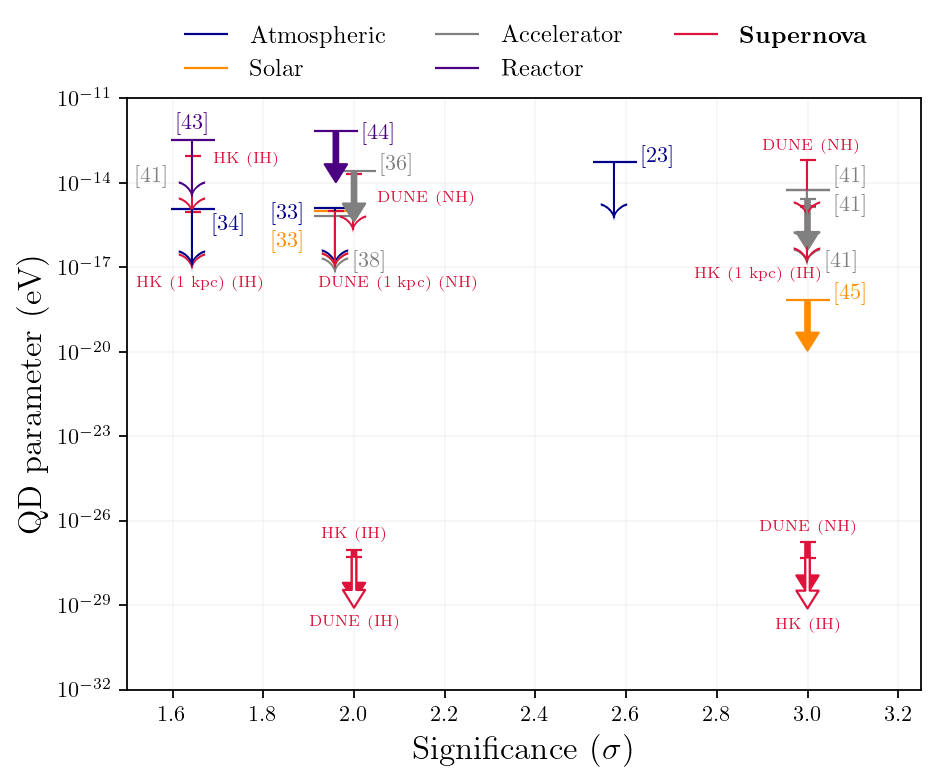

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from flavor_conversion import P_NH_nue, P_IH_nue, U3

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# fig = plt.figure(figsize=(6,5),dpi=160)
fig = plt.figure(dpi=160)

GeV_to_eV = 1e9

#Probing possible decoherence effects in atmospheric neutrino oscillations
#current data
g_23_atm = 5.5e-23 * GeV_to_eV
s_23_atm = 0.99
s_23_atm = np.sqrt(chi2.ppf(s_23_atm,1))

# Decoherence in neutrino propagation through matter, and bounds from IceCube/DeepCore
#current data
g_33_atm_noe = 1.3e-24 * GeV_to_eV
g_33_sol_noe = 9.7e-25 * GeV_to_eV
s_33_noe = 0.95
# s_33_noe = 1
s_33_noe = np.sqrt(chi2.ppf(s_33_noe,1))

# Searching for Decoherence from Quantum Gravity at the IceCube South Pole Neutrino Observatory
#current data
g_34_ice_noe = 1.18e-15 #eV
s_34_ice_noe = 0.90
s_34_ice_noe = np.sqrt(chi2.ppf(s_34_ice_noe,1))

g_34_ice_e = 1.17e-15 #eV
s_34_ice_e = 0.90
s_34_ice_e = np.sqrt(chi2.ppf(s_34_ice_noe,1))

# Quantum dissipation and CP violation in MINOS
#current data
g_36_acc_noe = 2.75e-14 #eV
s_36_acc_noe = 2
# s_36_acc_noe = 3

g_36_acc_e = 2.73e-14 #eV
s_36_acc_e = 2
# s_36_acc_e = 3

# Nonmaximal θ23 mixing at NOvA from neutrino decoherence
#current data
g_38_acc = 0.67e-24 * GeV_to_eV
s_38_acc = 0.95
# s_38_acc = 1
s_38_acc = np.sqrt(chi2.ppf(s_38_acc,1))

# Testing quantum decoherence at DUNE
#future data
g_41_acc_noe = 5.4e-24 * GeV_to_eV
s_41_acc_noe = 3
# s_41_acc_noe = 4

g_41_acc_e = 2.673e-24 * GeV_to_eV
s_41_acc_e = 3
# s_41_acc_e = 4

#future data
g_41_acc = 1.4e-24 * GeV_to_eV
s_41_acc = 3
# s_41_acc = 4

# Parameter limits for neutrino oscillation with decoherence in KamLAND
#current data
g_44_rea = 6.8e-22 * GeV_to_eV
s_44_rea = 0.95
# s_44_rea = 1
s_44_rea = np.sqrt(chi2.ppf(s_44_rea,1))

# Solar neutrino limits on decoherence
#current data
g_45_sol = 7.1e-19 #eV
s_45_sol = 3
# s_45_sol = 4

# Neutrino oscillation bounds on quantum decoherence
#current data
g_43_rea_noe = 3.3e-13 #eV
s_43_rea_noe = 0.90
s_43_rea_noe = np.sqrt(chi2.ppf(s_43_rea_noe,1))

g_43_acc_noe = 1e-14 #eV
s_43_acc_noe = 0.90
s_43_acc_noe = np.sqrt(chi2.ppf(s_43_acc_noe,1))

#future data
g_sn_ih = 9.3e-28 #eV
s_sn_ih = 2
# s_sn_ih = 3

#future data
g_sn_nh = 17e-28 #eV
s_sn_nh = 3
# s_sn_nh = 4

#future data
g_sn_loss_ih_dune = 5.2e-28 #eV
s_sn_loss_ih_dune = 2
# s_sn_loss_ih_dune = 4

#future data
g_sn_loss_ih_hk = 4.9e-28 #eV
s_sn_loss_ih_hk = 3
# s_sn_loss_ih_hk = 3

#future data
g_sn_nh_dune_noe_10 = 2e-14 #eV
s_sn_nh_dune_noe_10 = 2
# s_sn_nh_dune_noe_10 = 3

#future data (90%cl)
g_sn_nh_dune_noe_1 = 9.8e-16 #eV
s_sn_nh_dune_noe_1 = 0.95
# s_sn_nh_dune_noe_1 = 1
s_sn_nh_dune_noe_1 = np.sqrt(chi2.ppf(s_sn_nh_dune_noe_1,1))

#future data
g_sn_ih_hk_noe_10 = 8.8e-14 #eV
s_sn_ih_hk_noe_10 = 0.90
# s_sn_ih_hk_noe_10 = 2
s_sn_ih_hk_noe_10 = np.sqrt(chi2.ppf(s_sn_ih_hk_noe_10,1))

#future data
g_sn_ih_hk_noe_1 = 9.3e-16 #eV
s_sn_ih_hk_noe_1 = 0.90
# s_sn_ih_hk_noe_10 = 2
s_sn_ih_hk_noe_1 = np.sqrt(chi2.ppf(s_sn_ih_hk_noe_1,1))

#future data
g_sn_ih_hk_noe_3sig_1 = 1.5e-15 #eV
s_sn_ih_hk_noe_3sig_1 = 3

#future data
g_sn_nh_dune_noe_3sig =6.2e-14 #eV
s_sn_nh_dune_noe_3sig = 3

ms = 20
ms_e = 7
dg = 1.1
size = 30
a = 1
ss = 7

plt.plot(s_sn_ih_hk_noe_10, g_sn_ih_hk_noe_10, '_', markersize=ms_e, c='crimson')
plt.text(s_sn_ih_hk_noe_10, g_sn_ih_hk_noe_10 - g_sn_ih_hk_noe_10/dg, u'\u2193', fontname='STIXGeneral', size=size, va='center', ha='center', c='crimson')
plt.text(1.69, 5e-14, 'HK (IH)', size=ss, c='crimson')

plt.plot(s_sn_ih_hk_noe_1, g_sn_ih_hk_noe_1, '_', markersize=ms_e, c='crimson')
plt.text(s_sn_ih_hk_noe_1, g_sn_ih_hk_noe_1 - g_sn_ih_hk_noe_1/dg, u'\u2193', fontname='STIXGeneral', size=size, va='center', ha='center', c='crimson')
plt.text(1.52, 2e-18, 'HK (1 kpc) (IH)', size=ss, c='crimson')

plt.plot(s_23_atm, g_23_atm, '_', markersize=ms, c='darkblue', label='Atmospheric')
plt.text(s_23_atm, g_23_atm - g_23_atm/dg, u'\u2193', fontname='STIXGeneral', size=size, va='center', ha='center', c='darkblue')
plt.text(s_23_atm+0.06, g_23_atm, '[23]', c='darkblue')

plt.plot(s_33_noe, g_33_atm_noe, '_', markersize=ms, c='darkblue')
plt.text(s_33_noe, g_33_atm_noe - g_33_atm_noe/dg, u'\u2193', fontname='STIXGeneral', size=size, va='center', ha='center', c='darkblue')
plt.text(1.82, 5e-16, '[33]', c='darkblue')

plt.plot(s_33_noe, g_33_sol_noe, '_', markersize=ms, c='darkorange', label='Solar')
plt.text(s_33_noe, g_33_sol_noe - g_33_sol_noe/dg, u'\u2193', fontname='STIXGeneral', size=size, va='center', ha='center', c='darkorange')
plt.text(1.82, 5e-17, '[33]', c='darkorange')

plt.plot(s_sn_nh_dune_noe_10, g_sn_nh_dune_noe_10, '_', markersize=ms_e, c='crimson')
plt.text(s_sn_nh_dune_noe_10, g_sn_nh_dune_noe_10 - g_sn_nh_dune_noe_10/dg, u'\u2193', fontname='STIXGeneral', size=size, va='center', ha='center', c='crimson')
plt.text(s_sn_nh_dune_noe_10+0.05, 2e-15, 'DUNE (NH)', size=ss, c='crimson')

plt.plot(s_36_acc_e, g_36_acc_e, '_', markersize=ms, c='grey', label='Accelerator')
plt.annotate("", xy=(s_36_acc_e, g_36_acc_e - g_36_acc_e/1.011), xytext=(s_36_acc_e, g_36_acc_e+g_36_acc_e/3), arrowprops=dict(arrowstyle="simple, head_length=0.8, head_width=1", facecolor='grey', ec='grey'))
plt.text(s_36_acc_e+0.06, g_36_acc_noe, '[36]', c='grey')

# plt.plot(s_36_acc_noe, g_36_acc_noe, '_', markersize=ms, c='grey', label='Accelerator')
# plt.text(s_36_acc_noe, g_36_acc_noe - g_36_acc_noe/dg, u'\u2193', fontname='STIXGeneral', size=size, va='center', ha='center', c='grey')

plt.plot(s_38_acc, g_38_acc, '_', markersize=ms, c='grey')
plt.text(s_38_acc, g_38_acc - g_38_acc/dg, u'\u2193', fontname='STIXGeneral', size=size, va='center', ha='center', c='grey')
plt.text(2, 1e-17, '[38]', c='grey')

plt.plot(s_41_acc_noe, g_41_acc_noe, '_', markersize=ms, c='grey')
plt.text(s_41_acc_noe, g_41_acc_noe - g_41_acc_noe/dg, u'\u2193', fontname='STIXGeneral', size=size, va='center', ha='center', c='grey', alpha=a)
plt.text(s_41_acc_noe+0.06, 1e-14, '[41]', c='grey')

plt.plot(s_41_acc_e, g_41_acc_e, '_', markersize=ms_e, c='grey')
plt.text(s_41_acc_e+0.06, 1e-15, '[41]', c='grey')
plt.annotate("", xy=(s_41_acc_e, g_41_acc_e - g_41_acc_e/1.011), xytext=(s_41_acc_e, g_41_acc_e+g_41_acc_e/3), arrowprops=dict(arrowstyle="simple, head_length=0.8, head_width=1", facecolor='grey', ec='grey', alpha=a))

plt.plot(s_41_acc, g_41_acc, '_', markersize=ms_e, c='grey')
plt.text(s_41_acc, g_41_acc - g_41_acc/dg, u'\u2193', fontname='STIXGeneral', size=size, va='center', ha='center', c='grey', alpha=a)
plt.text(s_41_acc+0.04, 1e-17, '[41]', c='grey')

plt.plot(s_44_rea, g_44_rea, '_', markersize=ms, c='indigo', label='Reactor')
plt.text(s_44_rea+0.06, g_44_rea-g_44_rea/2, '[44]', c='indigo')
plt.annotate("", xy=(s_44_rea, g_44_rea - g_44_rea/1.011), xytext=(s_44_rea, g_44_rea+g_44_rea/3), arrowprops=dict(arrowstyle="simple, head_length=0.8, head_width=1", facecolor='indigo', ec='indigo'))

plt.plot(s_45_sol, g_45_sol, '_', markersize=ms, c='darkorange')
plt.text(s_45_sol+0.06, g_45_sol, '[45]', c='darkorange')
plt.annotate("", xy=(s_45_sol, g_45_sol - g_45_sol/1.011), xytext=(s_45_sol, g_45_sol+g_45_sol/3), arrowprops=dict(arrowstyle="simple, head_length=0.8, head_width=1", facecolor='darkorange', ec='darkorange'))

plt.plot(s_sn_ih, g_sn_ih, '_', markersize=ms_e, c='crimson')
plt.text(s_sn_ih, g_sn_ih + 2.5*g_sn_ih, 'HK (IH)', size=ss, va='center', ha='center', c='crimson')
plt.annotate("", xy=(s_sn_ih, g_sn_ih - g_sn_ih/1.011), xytext=(s_sn_ih, g_sn_ih+g_sn_ih/3), arrowprops=dict(arrowstyle="simple, head_length=0.8, head_width=1", facecolor='crimson', ec='crimson'))

plt.plot(s_sn_nh, g_sn_nh, '_', markersize=ms_e, c='crimson')
plt.text(s_sn_nh, g_sn_nh + 2.5*g_sn_nh, 'DUNE (NH)', size=ss, va='center', ha='center', c='crimson', weight='bold')
plt.annotate("", xy=(s_sn_nh, g_sn_nh - g_sn_nh/1.011), xytext=(s_sn_nh, g_sn_nh+g_sn_nh/3), arrowprops=dict(arrowstyle="simple, head_length=0.8, head_width=1", facecolor='crimson', ec='crimson'))

plt.plot(s_sn_loss_ih_hk, g_sn_loss_ih_hk, '_', markersize=ms_e, c='crimson')
plt.text(s_sn_loss_ih_hk, 2e-30, 'HK (IH)', size=ss, va='center', ha='center', c='crimson')
plt.annotate("", xy=(s_sn_loss_ih_hk, g_sn_loss_ih_hk - g_sn_loss_ih_hk/1.011), xytext=(s_sn_loss_ih_hk, g_sn_loss_ih_hk+g_sn_loss_ih_hk/2.2), arrowprops=dict(arrowstyle="simple, head_length=0.8, head_width=1", facecolor='w', ec='crimson'))

plt.plot(s_sn_loss_ih_dune, g_sn_loss_ih_dune, '_', markersize=ms_e, c='crimson')
plt.text(s_sn_loss_ih_dune, g_sn_loss_ih_dune - g_sn_loss_ih_dune/1.005, 'DUNE (IH)', size=ss, va='center', ha='center', c='crimson')
plt.annotate("", xy=(s_sn_loss_ih_dune, g_sn_loss_ih_dune - g_sn_loss_ih_dune/1.011), xytext=(s_sn_loss_ih_dune, g_sn_loss_ih_dune+g_sn_loss_ih_dune/2.2), arrowprops=dict(arrowstyle="simple, head_length=0.8, head_width=1", facecolor='w', ec='crimson'))

plt.plot(s_sn_nh_dune_noe_1, g_sn_nh_dune_noe_1, '_', markersize=ms_e, c='crimson')
plt.text(s_sn_nh_dune_noe_1, g_sn_nh_dune_noe_1 - g_sn_nh_dune_noe_1/dg, u'\u2193', fontname='STIXGeneral', size=size, va='center', ha='center', c='crimson')
plt.text(1.92, 2e-18, 'DUNE (1 kpc) (NH)', size=ss, c='crimson')

plt.plot(s_sn_nh_dune_noe_3sig, g_sn_nh_dune_noe_3sig, '_', markersize=ms_e, c='crimson')
plt.text(s_sn_nh_dune_noe_3sig, g_sn_nh_dune_noe_3sig - g_sn_nh_dune_noe_3sig/dg, u'\u2193', fontname='STIXGeneral', size=size, va='center', ha='center', c='crimson')
plt.text(2.9, 1.5e-13, 'DUNE (NH)', size=ss, c='crimson')

plt.plot(s_sn_ih_hk_noe_3sig_1, g_sn_ih_hk_noe_3sig_1, '_', markersize=ms_e, c='crimson')
plt.text(s_sn_ih_hk_noe_3sig_1, g_sn_ih_hk_noe_3sig_1 - g_sn_ih_hk_noe_3sig_1/dg, u'\u2193', fontname='STIXGeneral', size=size, va='center', ha='center', c='crimson')
plt.text(2.75, 4e-18, 'HK (1 kpc) (IH)', size=ss, c='crimson')

plt.plot(s_43_rea_noe, g_43_rea_noe, '_', markersize=ms, c='indigo')
plt.text(s_43_rea_noe, g_43_rea_noe - g_43_rea_noe/dg, u'\u2193', fontname='STIXGeneral', size=size, va='center', ha='center', c='indigo', alpha=a)
plt.text(1.61, 8e-13, '[43]', c='indigo')

plt.plot(s_41_acc_noe, g_41_acc_noe, '_', markersize=ms, c='grey')
plt.text(s_41_acc_noe, g_41_acc_noe - g_41_acc_noe/dg, u'\u2193', fontname='STIXGeneral', size=size, va='center', ha='center', c='grey', alpha=a)
plt.text(1.52, 1e-14, '[41]', c='grey')


plt.plot(s_34_ice_noe, g_34_ice_noe, '_', markersize=ms, c='darkblue')
plt.text(s_34_ice_noe, g_34_ice_noe - g_34_ice_noe/dg, u'\u2193', fontname='STIXGeneral', size=size, va='center', ha='center', c='darkblue', alpha=a)
plt.text(1.69, 2e-16, '[34]', c='darkblue')

# x = ['90\%', '95\%', '99\%', r'2$\sigma$', r'3$\sigma$']
# default_x_ticks = range(len(x))
# plt.xticks(default_x_ticks, x, fontsize=13)

plt.xlabel(r'Significance ($\sigma$)', fontsize=15)
plt.ylabel(r'QD parameter (eV)', fontsize=15)
plt.yscale('log')
plt.ylim(1e-32,1e-11)
plt.xlim(1.5,3.25)
plt.grid(alpha=0.1)
plt.plot([], [], '_', markersize=ms, c='crimson', label=r'$\mathbf{Supernova}$')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.16),fontsize=11, ncol=3, frameon=False)
# plt.tight_layout()
plt.savefig('plots/bounds.pdf', dpi=160)
plt.show()